In [1]:
import numpy as np
from utils.noise import make_noise
from utils.recollection import recollection
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
#ノイズと閾値の設定
thete = 0
N = 100
epoch =1000

#画像の読み込み
Q_1 = np.loadtxt("picture/picture_1.csv", delimiter = ",", dtype = int)
q_1 = np.array([Q_1.flatten()])
Q_2 = np.loadtxt("picture/picture_2.csv", delimiter = ",", dtype = int)
q_2 = np.array([Q_2.flatten()])
Q_3 = np.loadtxt("picture/picture_3.csv", delimiter = ",", dtype = int)
q_3 = np.array([Q_3.flatten()])
Q_4 = np.loadtxt("picture/picture_4.csv", delimiter = ",", dtype = int)
q_4 = np.array([Q_4.flatten()])
Q_5 = np.loadtxt("picture/picture_5.csv", delimiter = ",", dtype = int)
q_5 = np.array([Q_5.flatten()])
Q_6 = np.loadtxt("picture/picture_6.csv", delimiter = ",", dtype = int)
q_6 = np.array([Q_6.flatten()])

q = np.zeros([6,25])
q[0] = q_1[0]
q[1] = q_2[0]
q[2] = q_3[0]
q[3] = q_4[0]
q[4] = q_5[0]
q[5] = q_6[0]

#重み行列の作成
W =  np.dot(q_1.T,q_1) + np.dot(q_2.T,q_2) + np.dot(q_4.T,q_4) + np.dot(q_5.T,q_5)
#Wの対角成分をゼロに
W_diag = np.diag(W)
W_diag.flags.writeable = True
np.putmask(W_diag, W_diag > 0, 0)


q_rec_all = np.zeros((10,6,1000, 25))

for n in range(10):
    noise = (n+1)*10
    print('noise{}%'.format(noise))
    similar_all = np.zeros((6,1000,100))
    q_noise_all = np.zeros((6,1000, 25))
    
    recall_performance = np.zeros(6)
    correct_answer = np.zeros(6)

    for e in range(epoch):
        q_noise_all[0][e] = make_noise(q_1, noise)
        q_noise_all[1][e] = make_noise(q_2, noise)
        q_noise_all[2][e] = make_noise(q_3, noise)
        q_noise_all[3][e] = make_noise(q_4, noise)
        q_noise_all[4][e] = make_noise(q_5, noise)
        q_noise_all[5][e] = make_noise(q_6, noise)

        similar_all[0][e], q_rec_all[n][0][e] = recollection(q[0], q_noise_all[0][e], W, thete, N)
        similar_all[1][e], q_rec_all[n][1][e] = recollection(q[1], q_noise_all[1][e], W, thete, N)            
        similar_all[2][e], q_rec_all[n][2][e] = recollection(q[2], q_noise_all[2][e], W, thete, N)
        similar_all[3][e], q_rec_all[n][3][e] = recollection(q[3], q_noise_all[3][e], W, thete, N)
        similar_all[4][e], q_rec_all[n][4][e] = recollection(q[4], q_noise_all[4][e], W, thete, N)            
        similar_all[5][e], q_rec_all[n][5][e] = recollection(q[5], q_noise_all[5][e], W, thete, N)
            
        recall_performance[0] += similar_all[0][e][-1]
        recall_performance[1] += similar_all[1][e][-1]
        recall_performance[2] += similar_all[2][e][-1]
        recall_performance[3] += similar_all[3][e][-1]
        recall_performance[4] += similar_all[4][e][-1]
        recall_performance[5] += similar_all[5][e][-1]


        if similar_all[0][e][-1] == 1.0:
            correct_answer[0] += 1
        if similar_all[1][e][-1] == 1.0:
            correct_answer[1] += 1
        if similar_all[2][e][-1] == 1.0:
            correct_answer[2] += 1
        if similar_all[3][e][-1] == 1.0:
            correct_answer[3] += 1
        if similar_all[4][e][-1] == 1.0:
            correct_answer[4] += 1
        if similar_all[5][e][-1] == 1.0:
            correct_answer[5] += 1

    recall_performance_average = recall_performance / 1000

    correct_answer_rate = correct_answer / 1000

    print('<picture1>\n類似度の全試行平均:{} 正答率:{}'.format(recall_performance_average[0], correct_answer_rate[0]))
    print('<picture2>\n類似度の全試行平均:{} 正答率:{}'.format(recall_performance_average[1], correct_answer_rate[1]))
    #print('<picture3>\n類似度の全試行平均:{} 正答率:{}'.format(recall_performance_average[2], correct_answer_rate[2]))
    print('<picture4>\n類似度の全試行平均:{} 正答率:{}'.format(recall_performance_average[3], correct_answer_rate[3]))
    print('<picture5>\n類似度の全試行平均:{} 正答率:{}'.format(recall_performance_average[4], correct_answer_rate[4]))
    #print('<picture6>\n類似度の全試行平均:{} 正答率:{}'.format(recall_performance_average[5], correct_answer_rate[5]))



noise10%
<picture1>
類似度の全試行平均:0.8086399999999913 正答率:0.0
<picture2>
類似度の全試行平均:0.9979600000000006 正答率:0.954
<picture4>
類似度の全試行平均:0.9594800000000114 正答率:0.02
<picture5>
類似度の全試行平均:0.8409200000000046 正答率:0.0
noise20%
<picture1>
類似度の全試行平均:0.8035999999999904 正答率:0.0
<picture2>
類似度の全試行平均:0.9954400000000009 正答率:0.896
<picture4>
類似度の全試行平均:0.9561200000000103 正答率:0.046
<picture5>
類似度の全試行平均:0.8362000000000032 正答率:0.0
noise30%
<picture1>
類似度の全試行平均:0.766519999999993 正答率:0.0
<picture2>
類似度の全試行平均:0.9625600000000006 正答率:0.815
<picture4>
類似度の全試行平均:0.9217600000000078 正答率:0.048
<picture5>
類似度の全試行平均:0.8024800000000033 正答率:0.0
noise40%
<picture1>
類似度の全試行平均:0.6475199999999977 正答率:0.0
<picture2>
類似度の全試行平均:0.8218000000000003 正答率:0.662
<picture4>
類似度の全試行平均:0.7648000000000027 正答率:0.033
<picture5>
類似度の全試行平均:0.6744000000000001 正答率:0.0
noise50%
<picture1>
類似度の全試行平均:0.4816000000000053 正答率:0.0
<picture2>
類似度の全試行平均:0.5074400000000036 正答率:0.394
<picture4>
類似度の全試行平均:0.4881199999999978 正答率:0.028
<picture5>
類似度の全試行平均:0.51

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


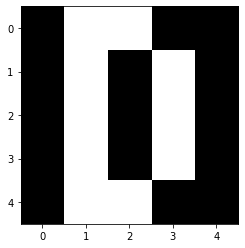

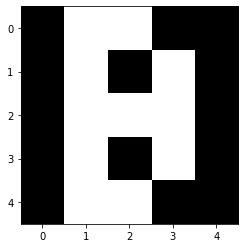

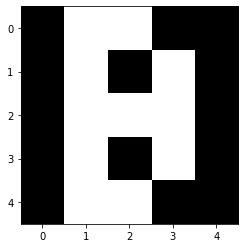

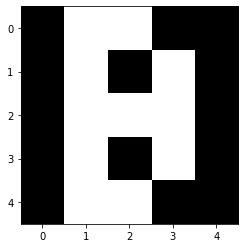

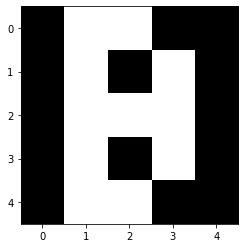

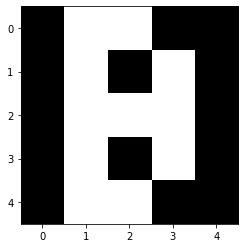

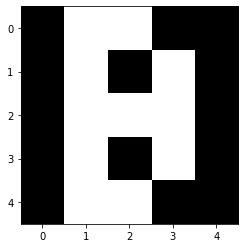

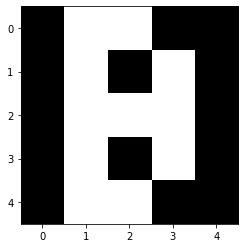

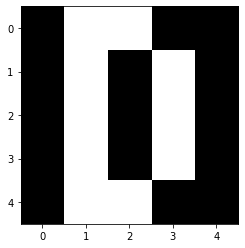

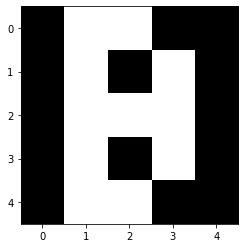

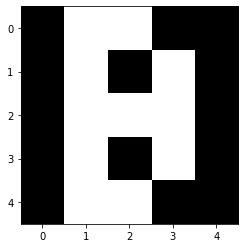

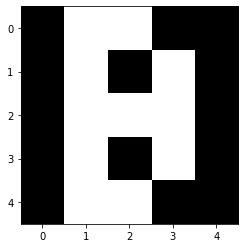

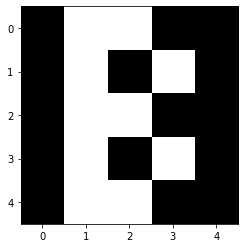

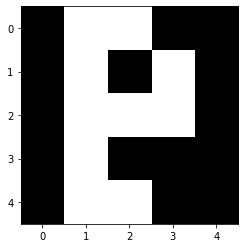

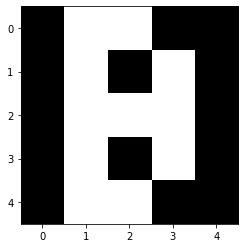

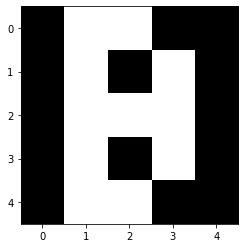

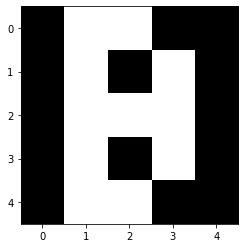

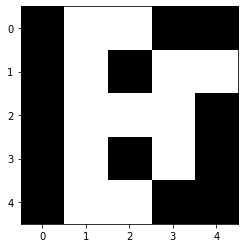

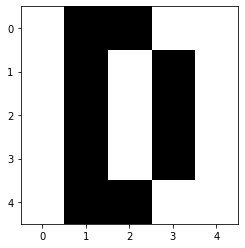

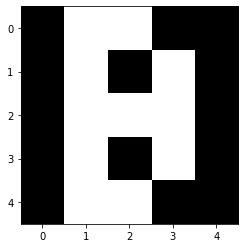

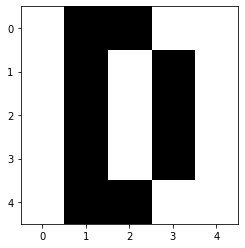

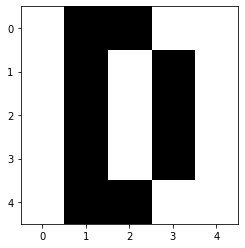

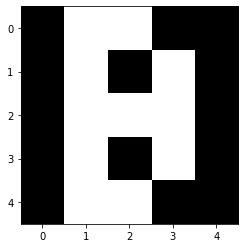

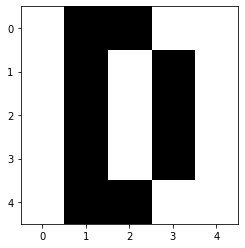

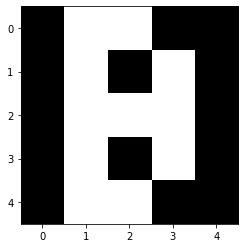

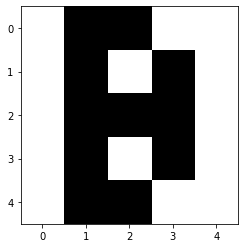

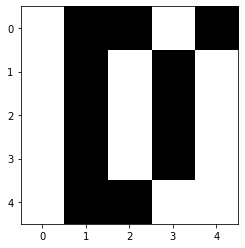

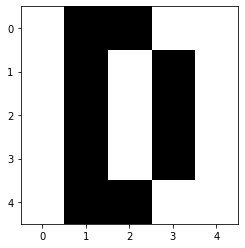

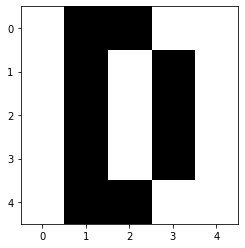

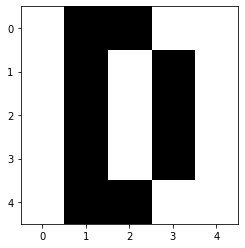

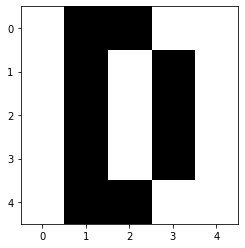

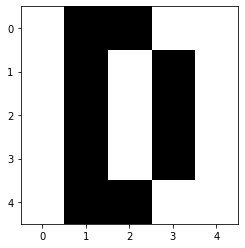

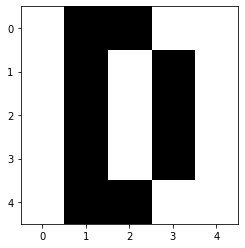

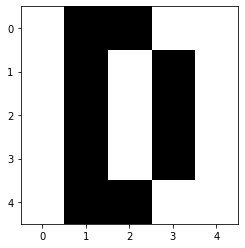

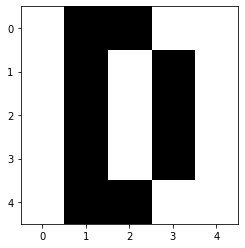

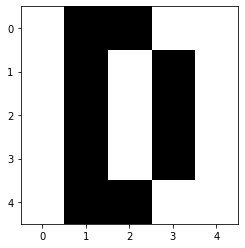

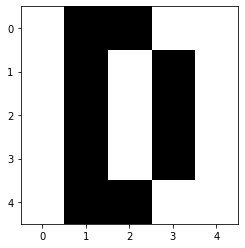

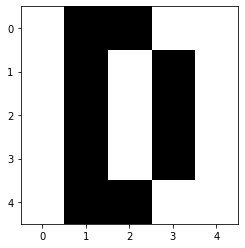

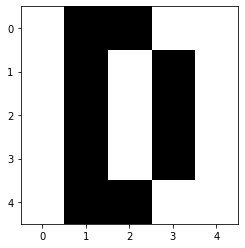

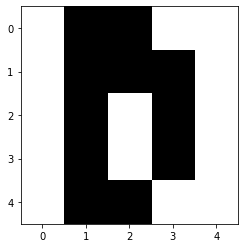

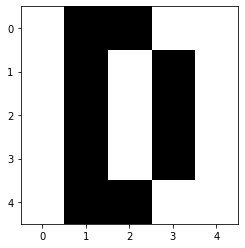

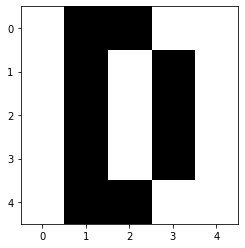

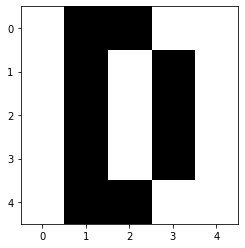

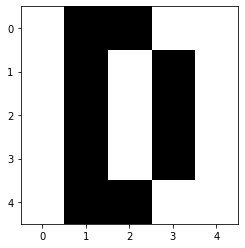

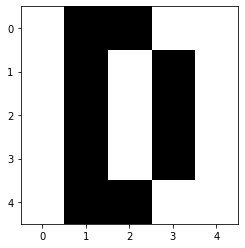

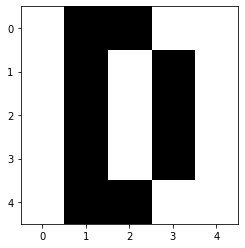

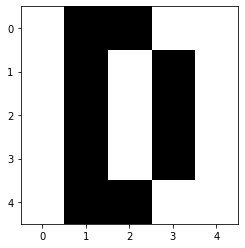

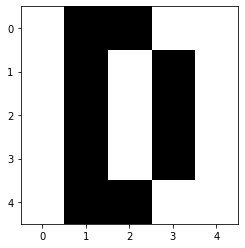

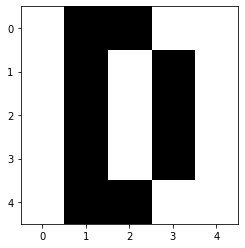

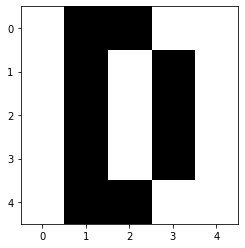

In [4]:
for i in range(10):
    for j in range(5):
        fig, ax = plt.subplots()
        ax.imshow(q_rec_all[i][0][10*j].reshape(5,5), cmap="gray")

    

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


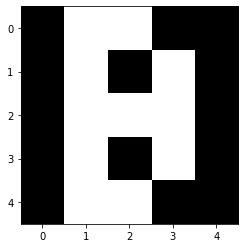

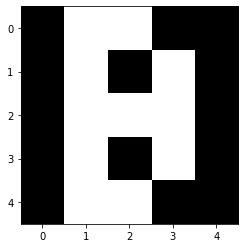

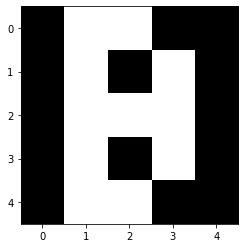

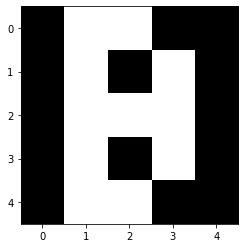

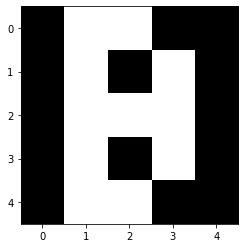

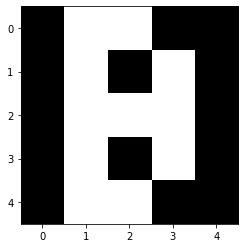

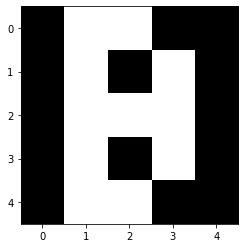

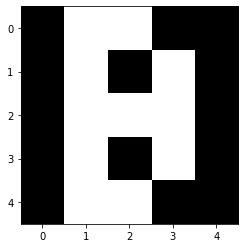

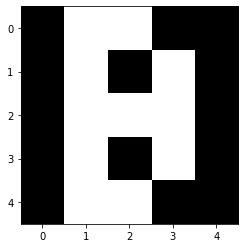

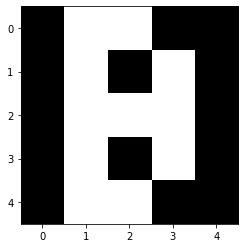

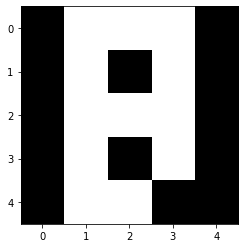

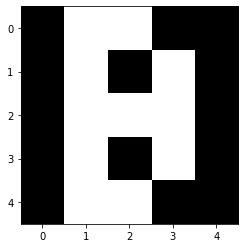

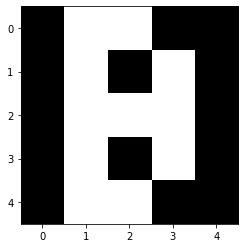

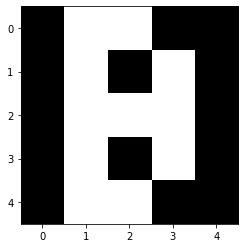

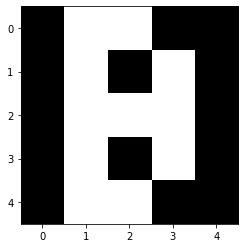

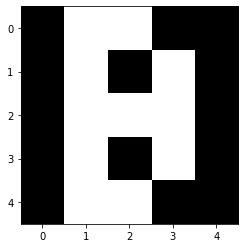

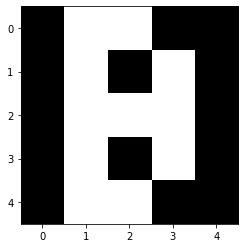

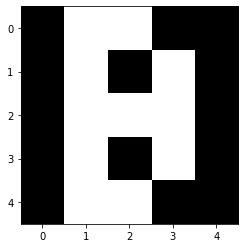

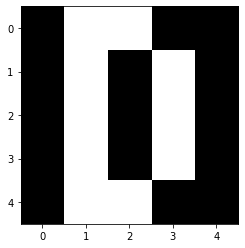

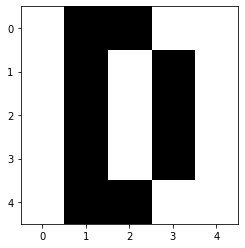

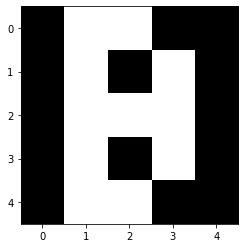

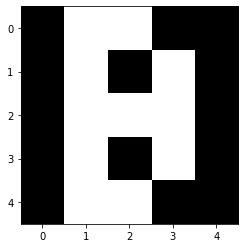

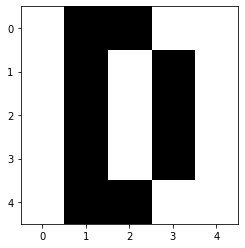

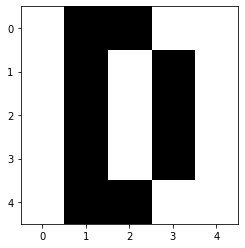

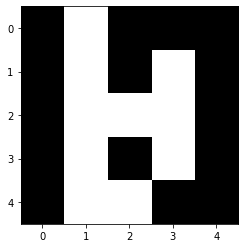

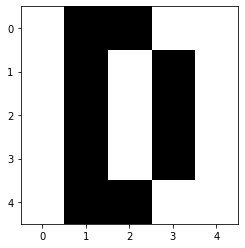

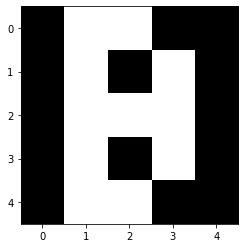

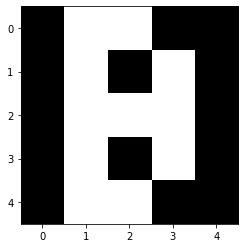

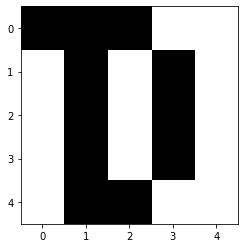

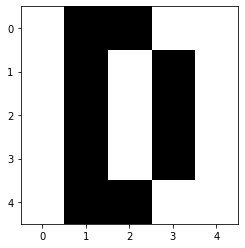

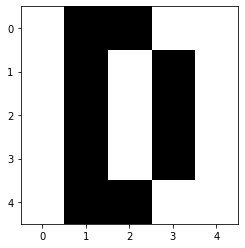

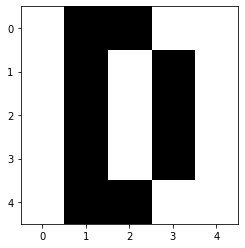

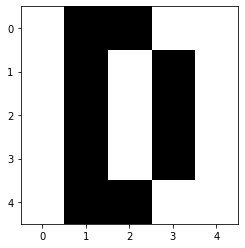

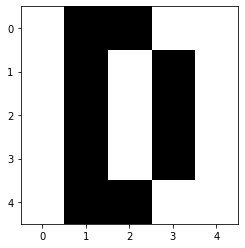

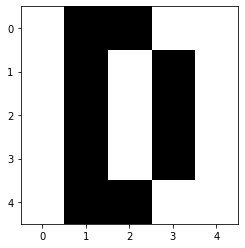

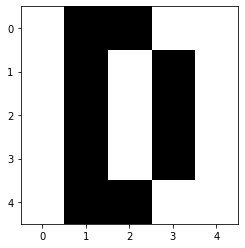

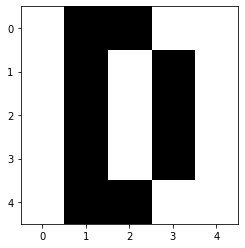

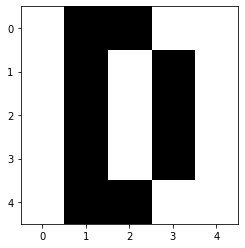

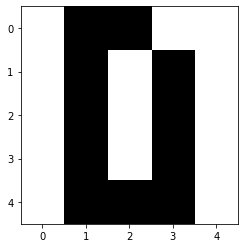

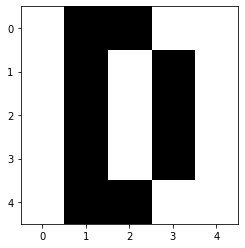

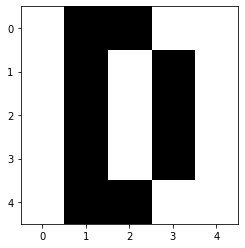

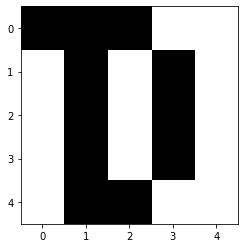

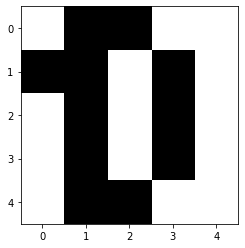

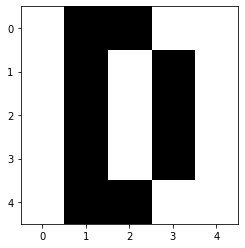

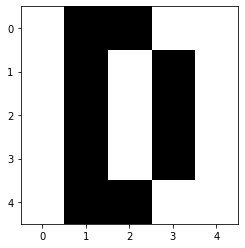

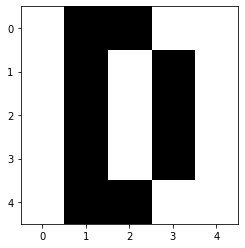

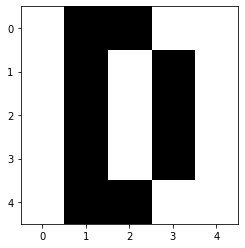

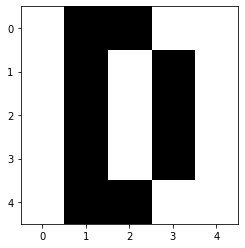

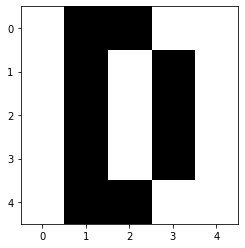

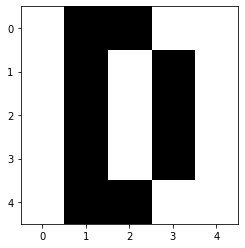

In [5]:
for i in range(10):
    for j in range(5):
        fig, ax = plt.subplots()
        ax.imshow(q_rec_all[i][1][10*j].reshape(5,5), cmap="gray")


/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


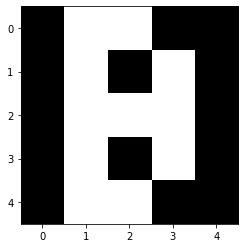

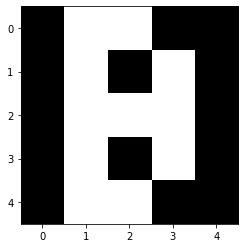

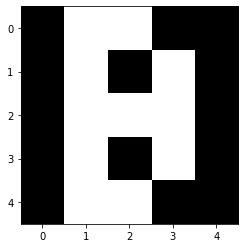

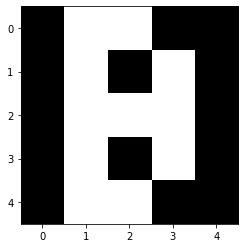

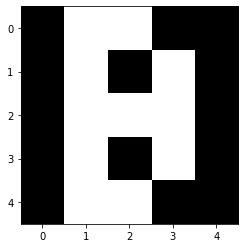

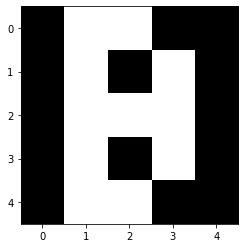

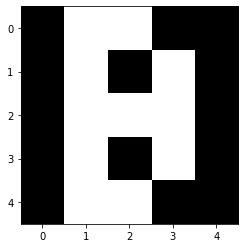

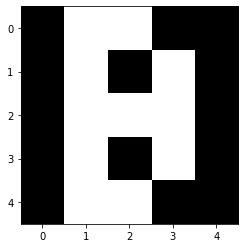

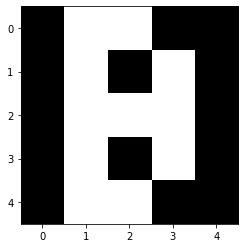

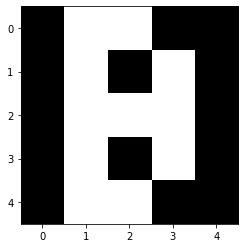

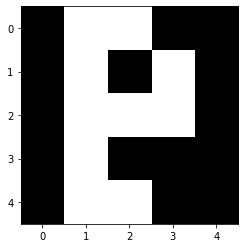

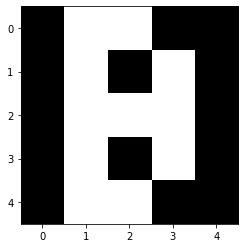

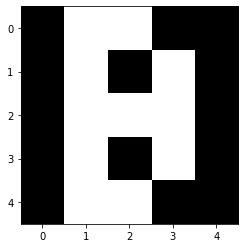

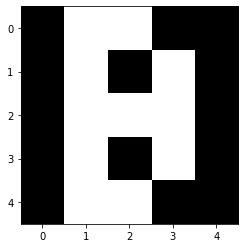

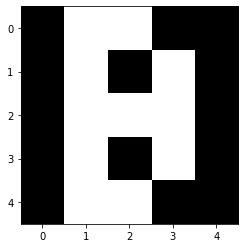

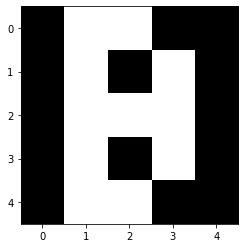

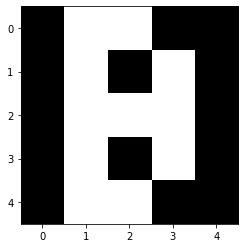

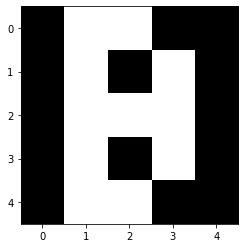

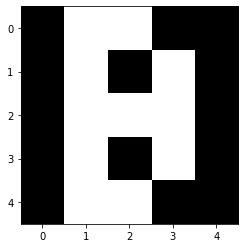

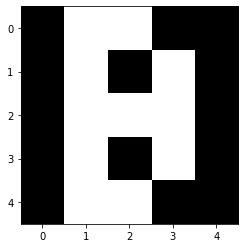

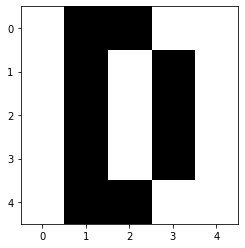

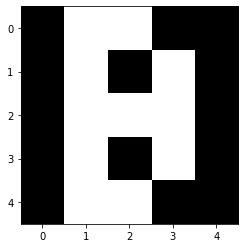

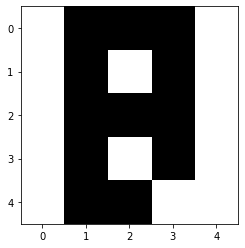

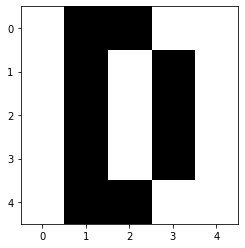

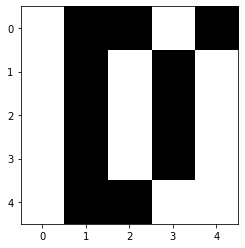

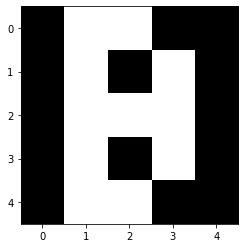

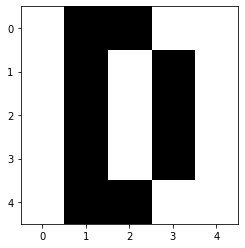

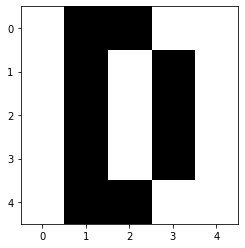

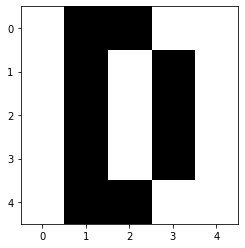

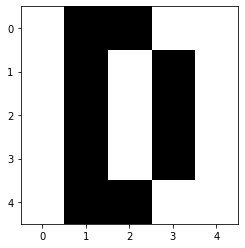

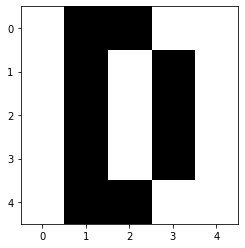

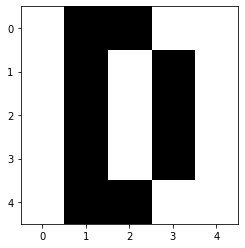

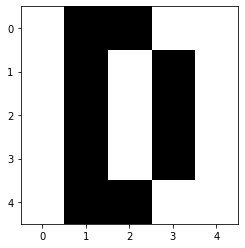

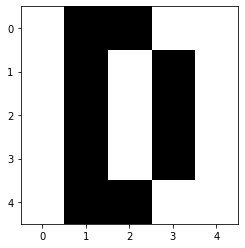

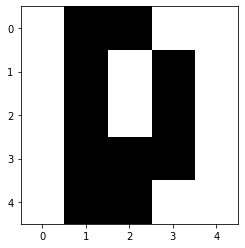

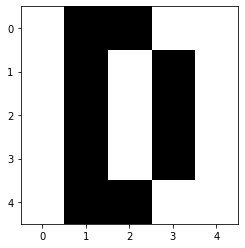

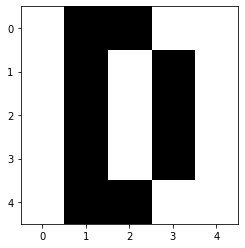

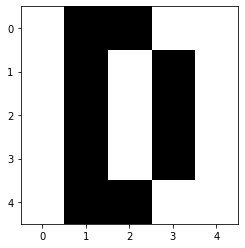

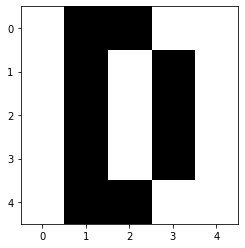

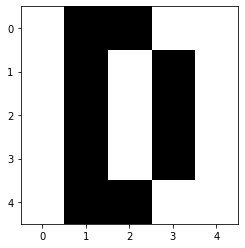

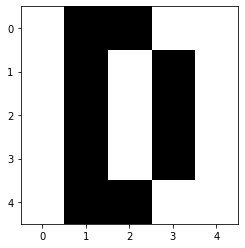

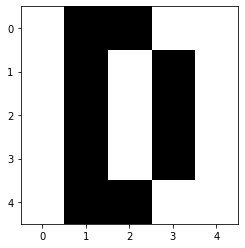

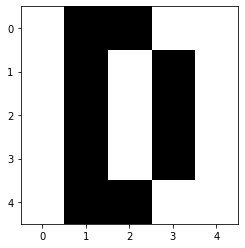

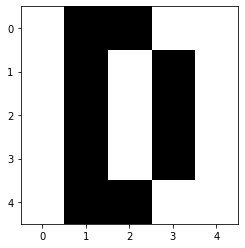

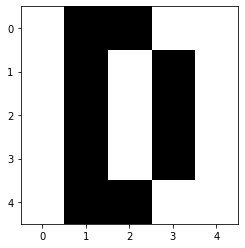

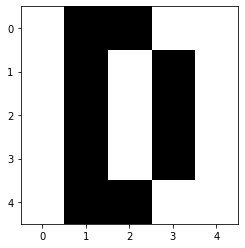

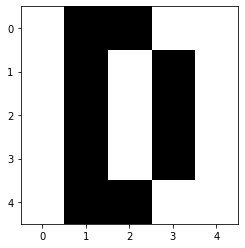

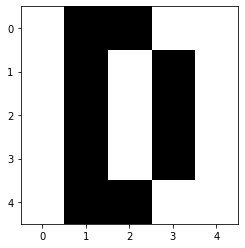

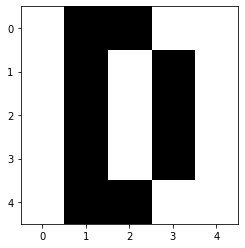

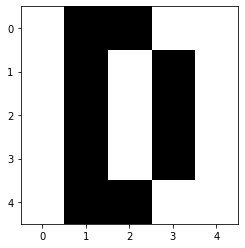

In [6]:
for i in range(10):
    for j in range(5):
        fig, ax = plt.subplots()
        ax.imshow(q_rec_all[i][3][10*j].reshape(5,5), cmap="gray")


/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


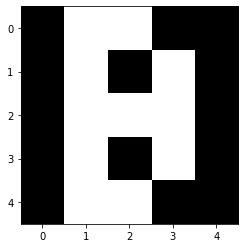

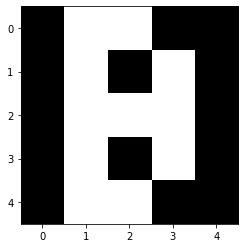

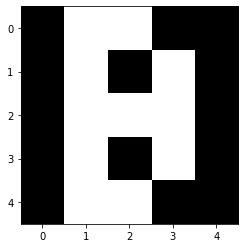

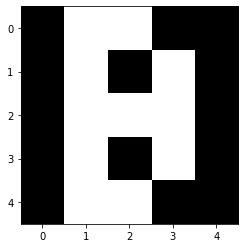

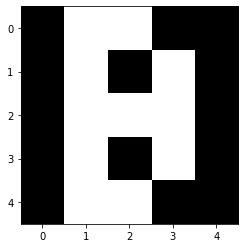

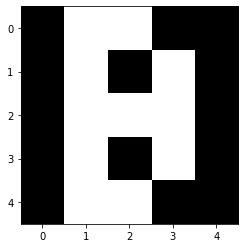

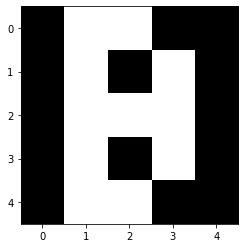

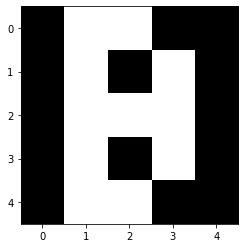

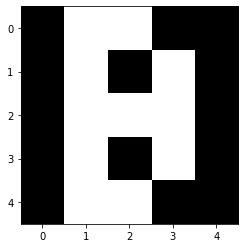

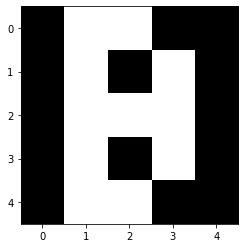

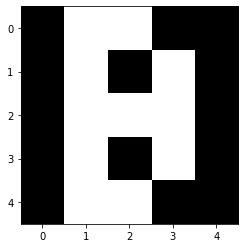

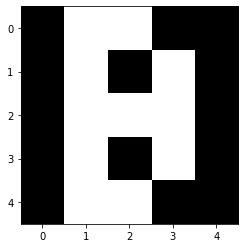

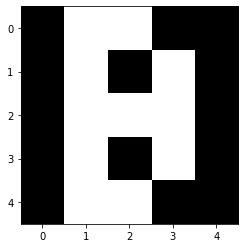

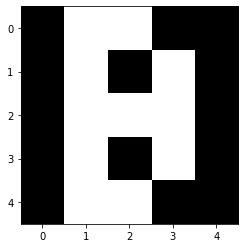

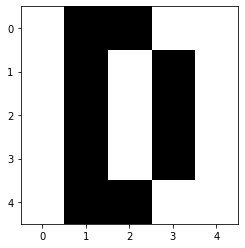

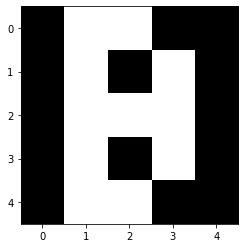

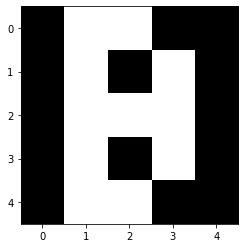

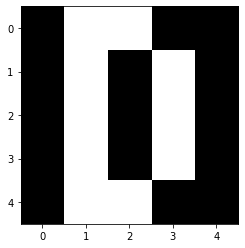

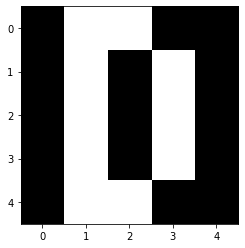

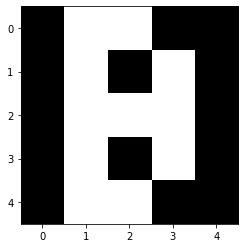

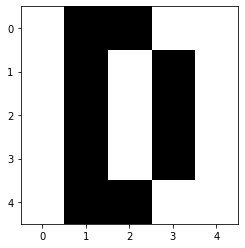

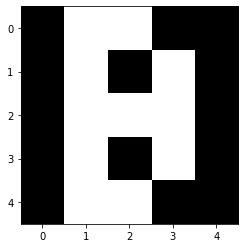

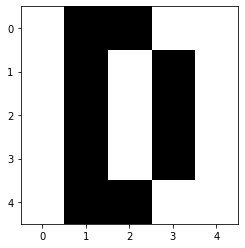

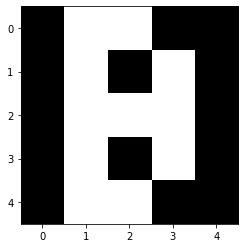

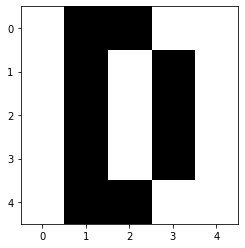

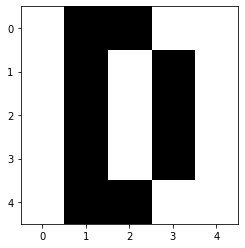

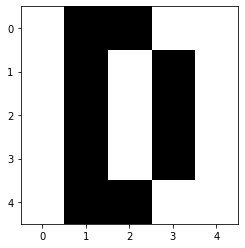

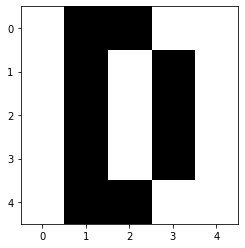

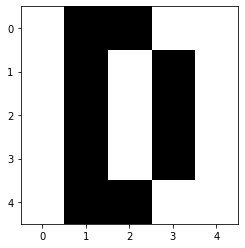

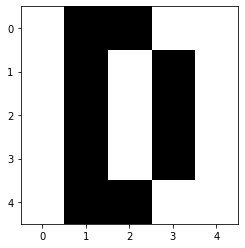

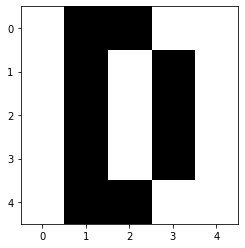

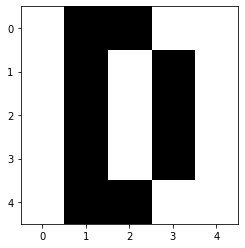

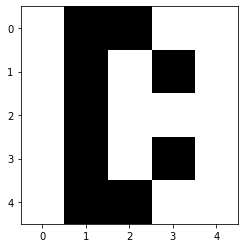

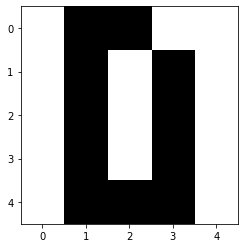

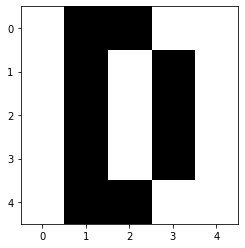

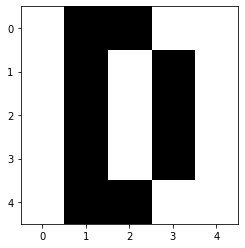

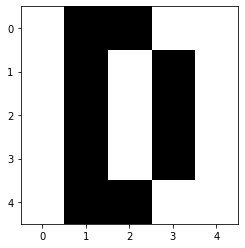

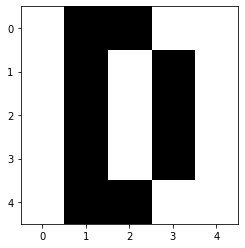

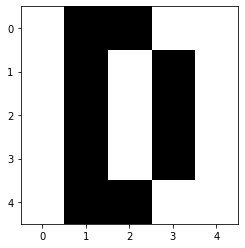

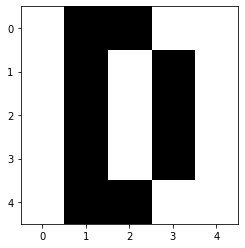

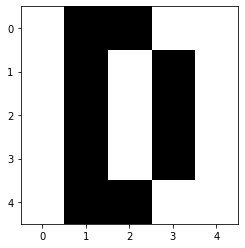

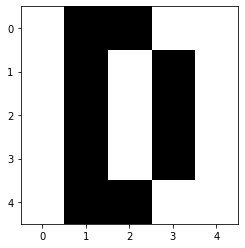

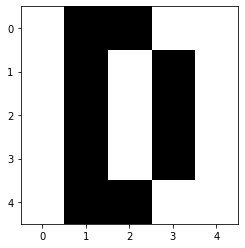

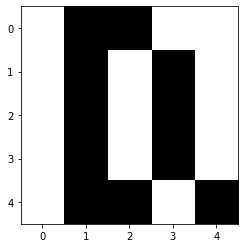

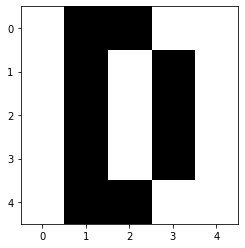

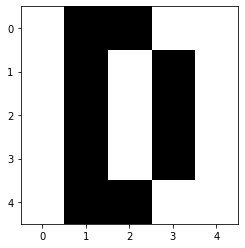

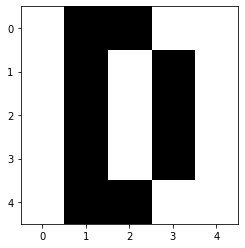

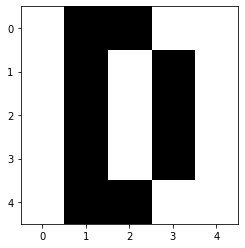

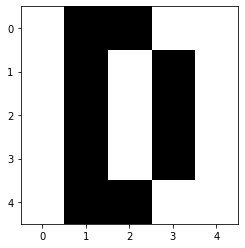

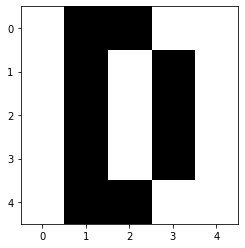

In [7]:
for i in range(10):
    for j in range(5):
        fig, ax = plt.subplots()
        ax.imshow(q_rec_all[i][4][10*j].reshape(5,5), cmap="gray")


/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


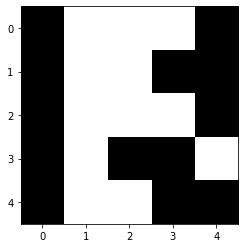

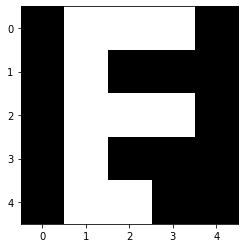

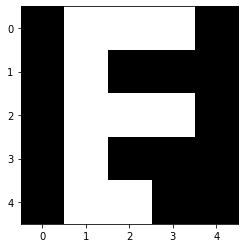

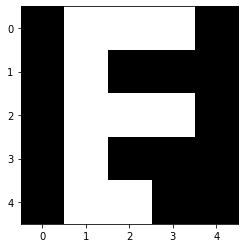

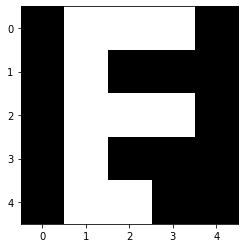

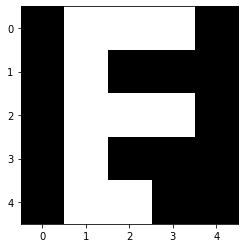

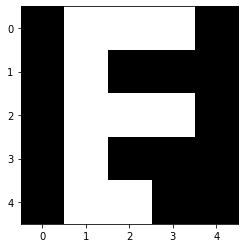

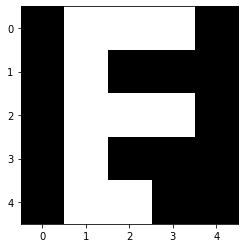

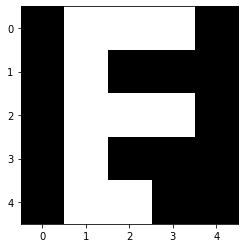

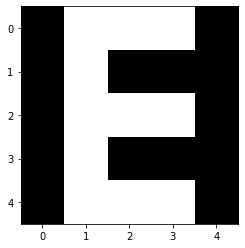

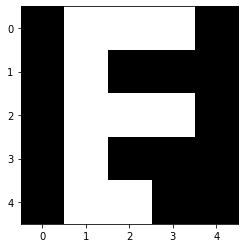

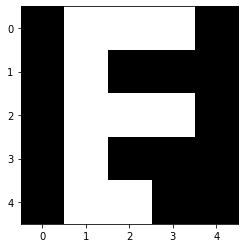

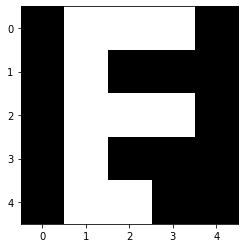

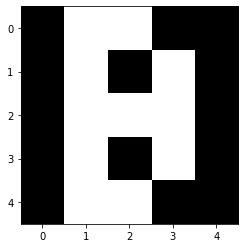

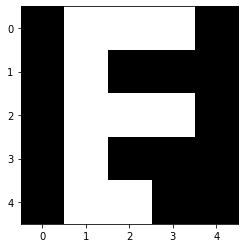

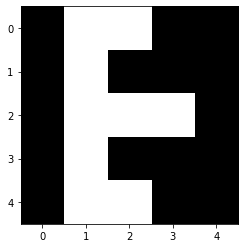

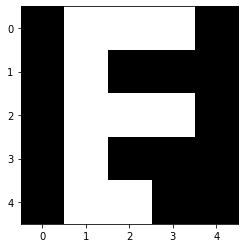

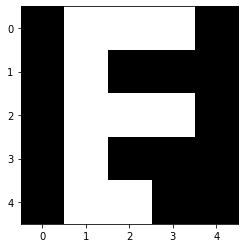

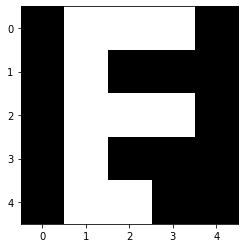

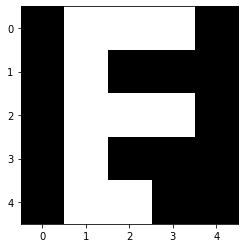

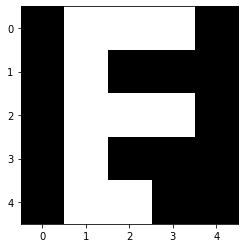

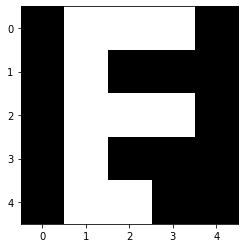

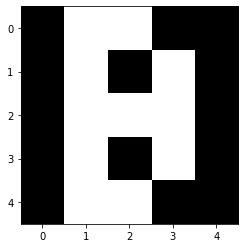

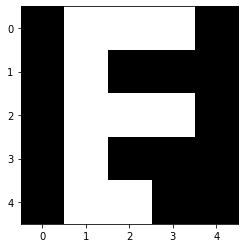

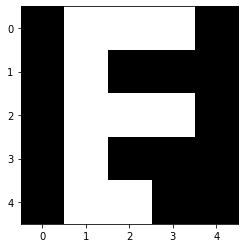

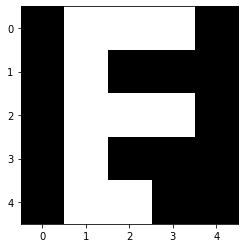

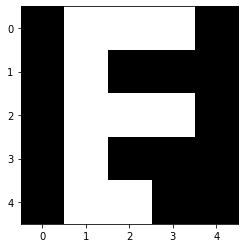

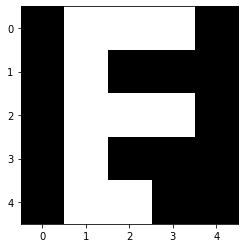

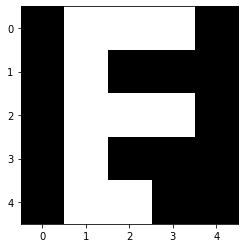

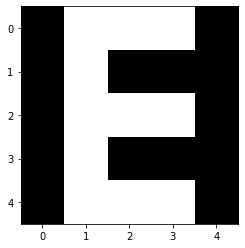

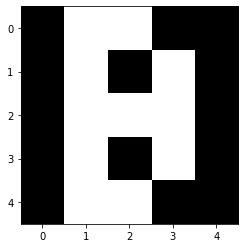

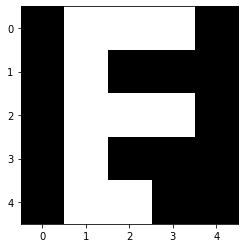

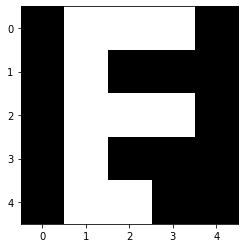

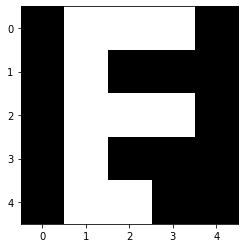

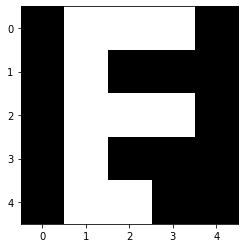

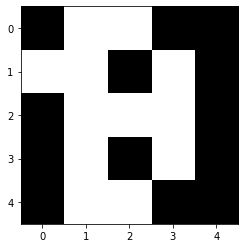

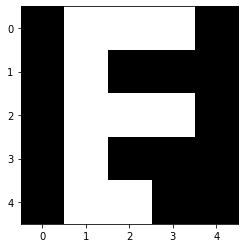

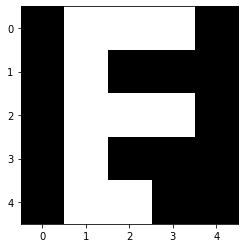

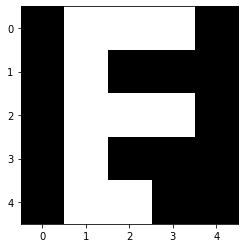

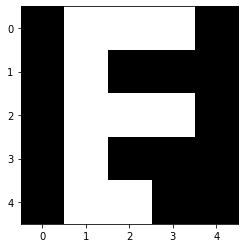

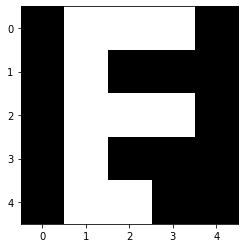

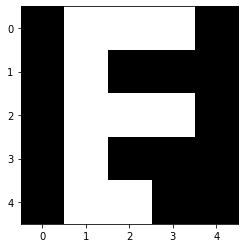

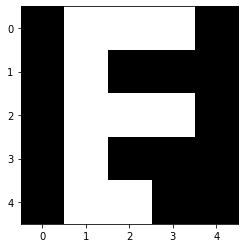

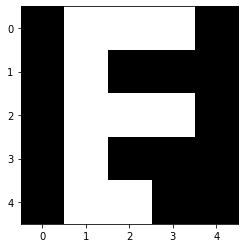

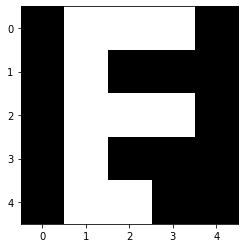

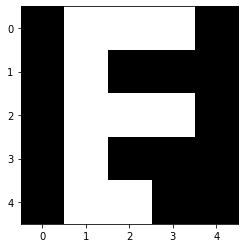

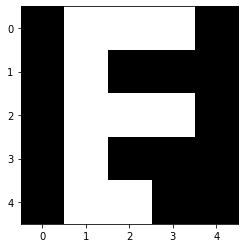

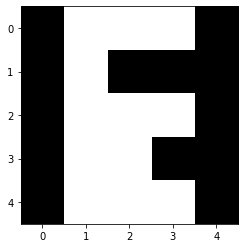

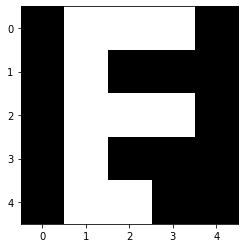

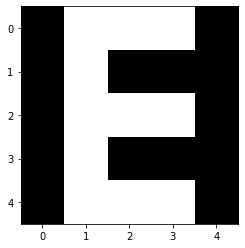

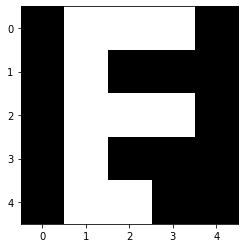

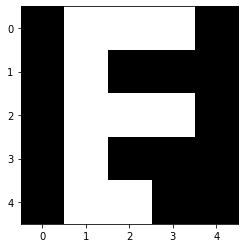

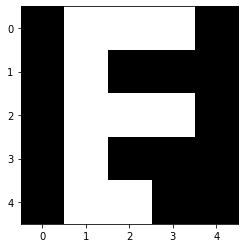

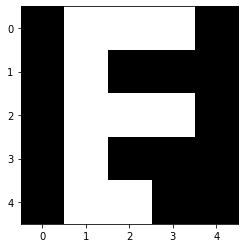

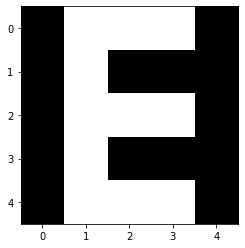

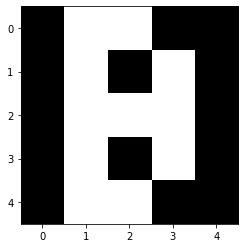

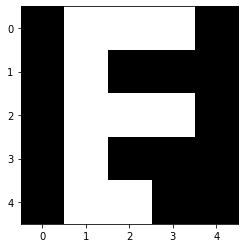

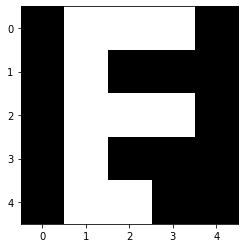

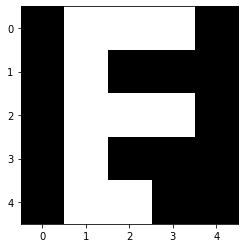

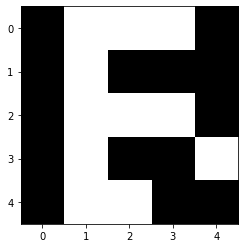

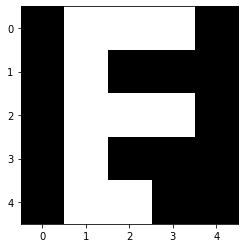

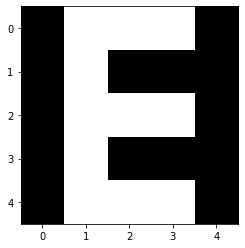

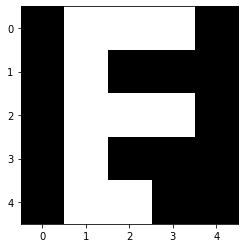

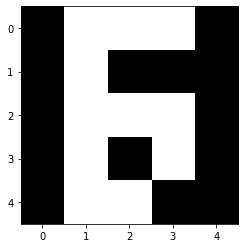

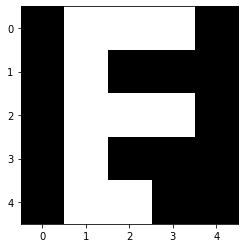

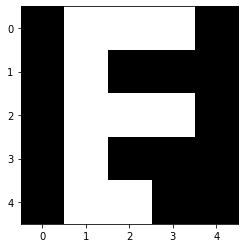

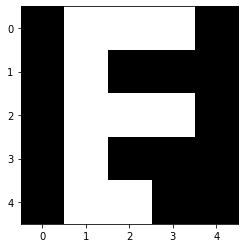

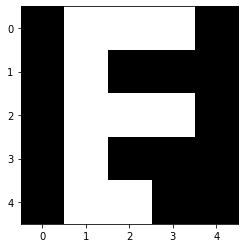

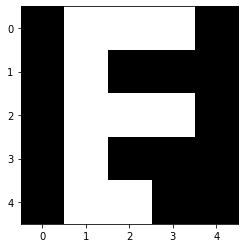

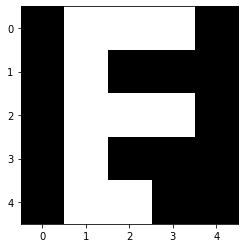

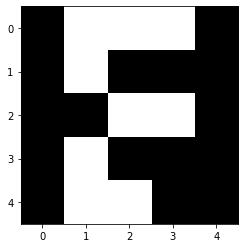

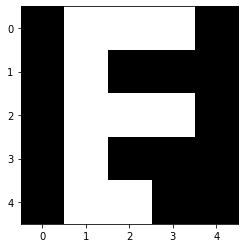

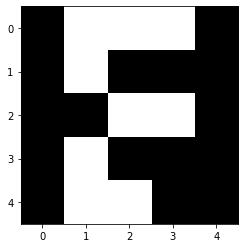

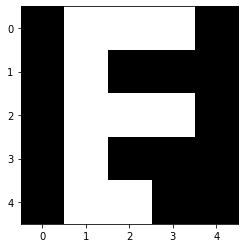

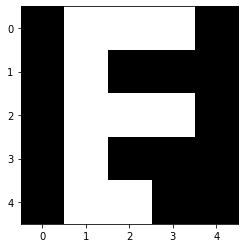

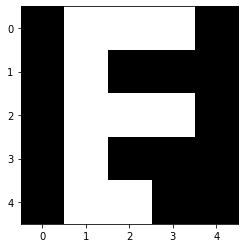

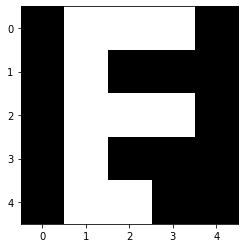

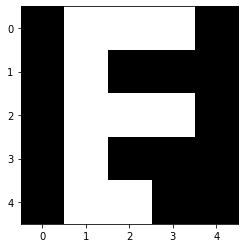

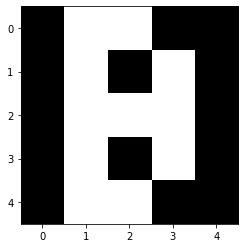

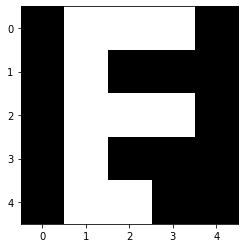

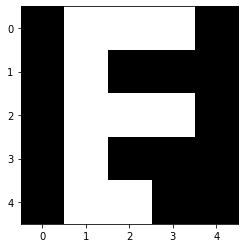

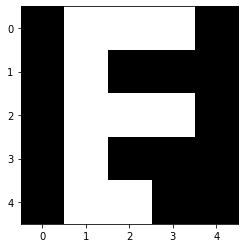

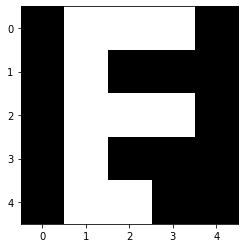

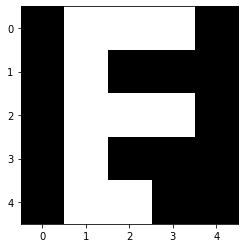

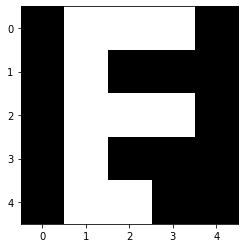

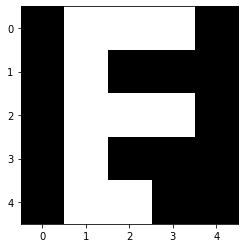

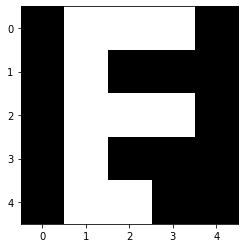

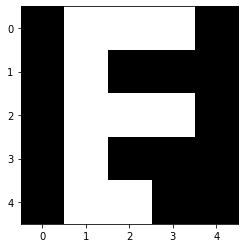

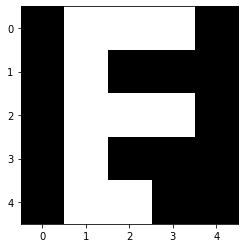

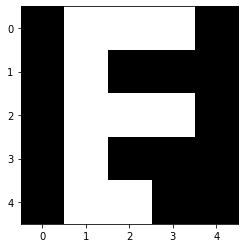

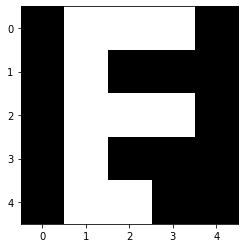

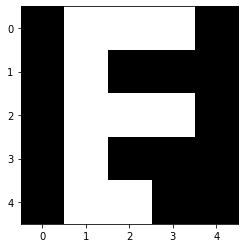

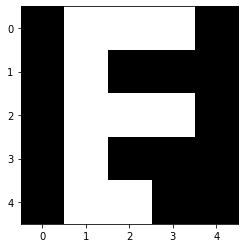

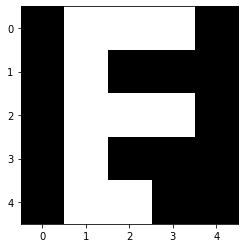

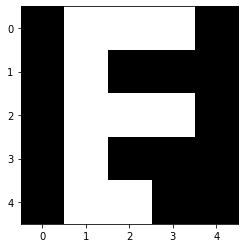

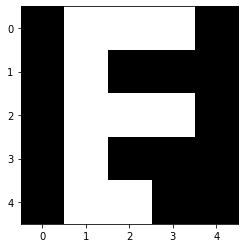

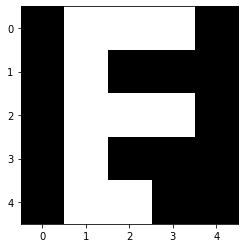

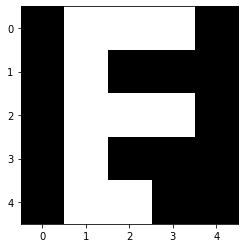

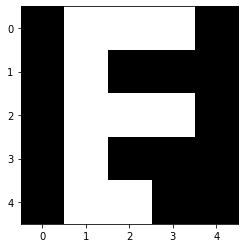

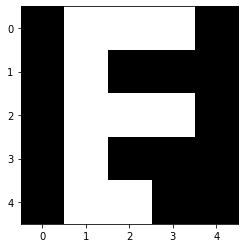

In [7]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.imshow(q_rec_all[4][10*i].reshape(5,5), cmap="gray")

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


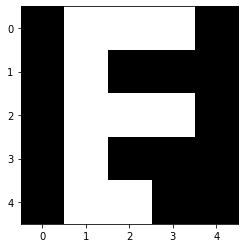

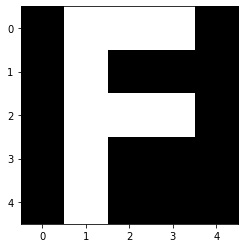

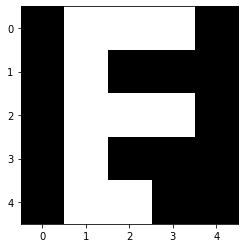

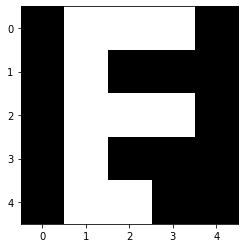

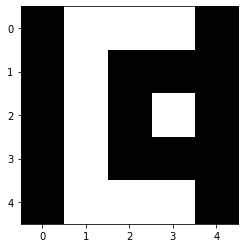

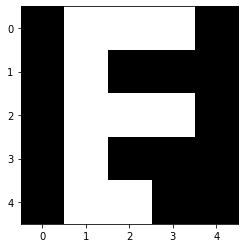

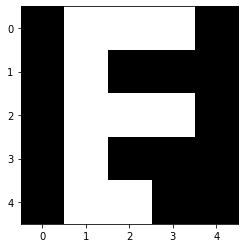

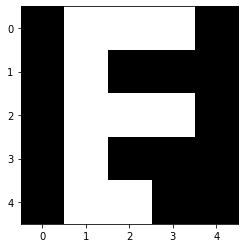

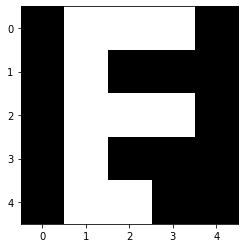

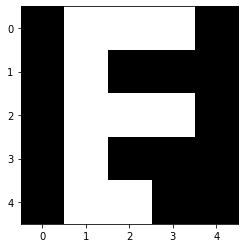

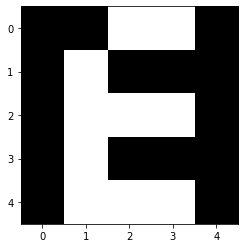

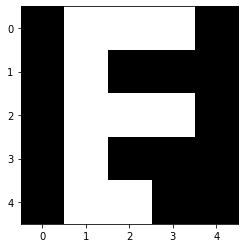

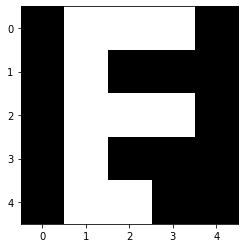

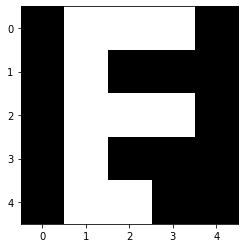

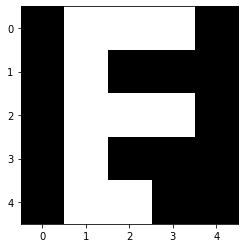

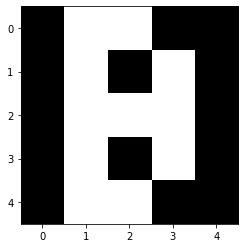

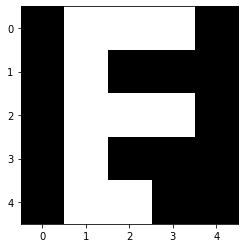

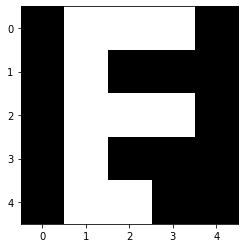

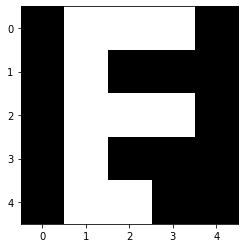

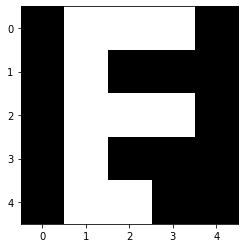

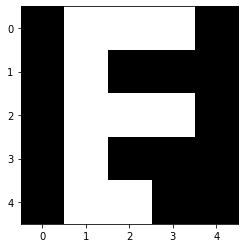

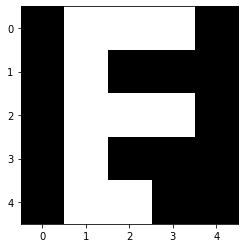

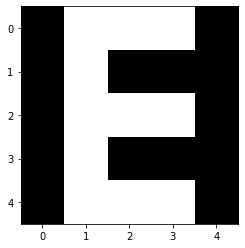

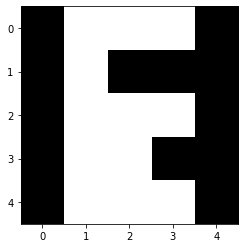

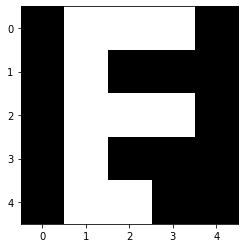

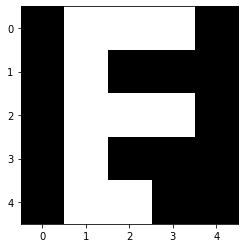

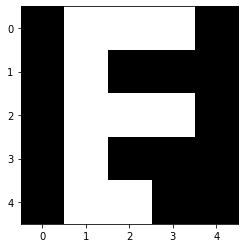

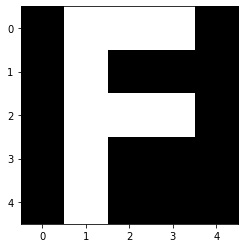

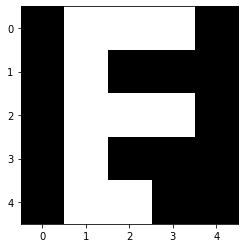

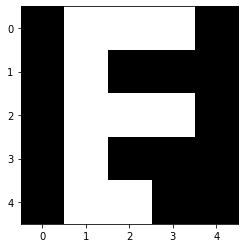

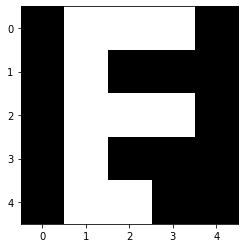

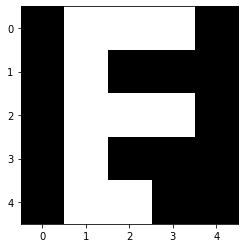

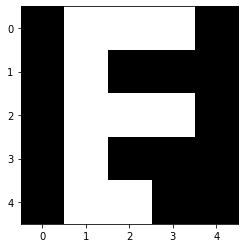

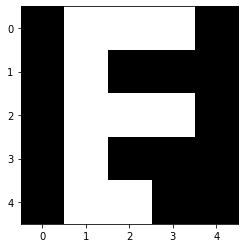

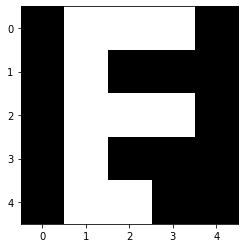

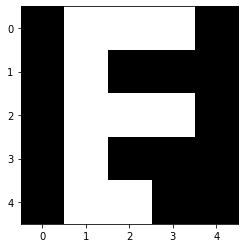

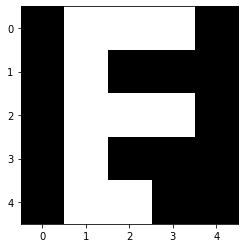

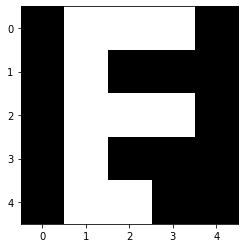

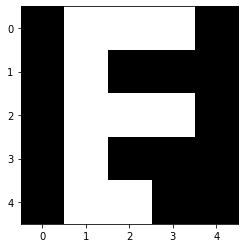

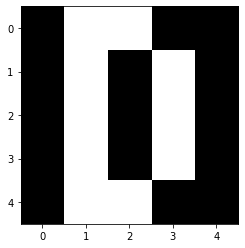

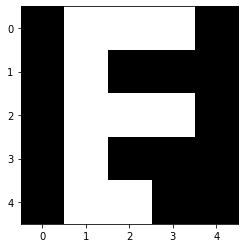

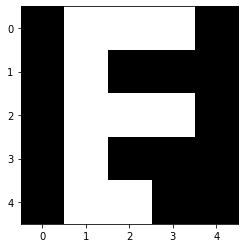

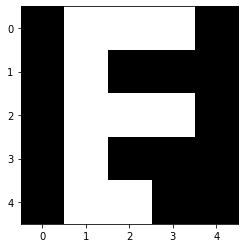

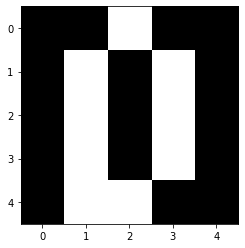

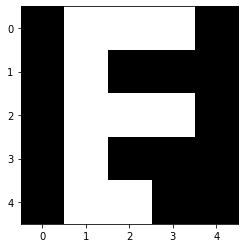

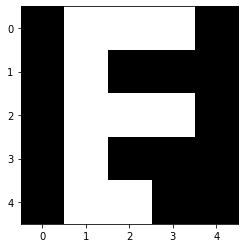

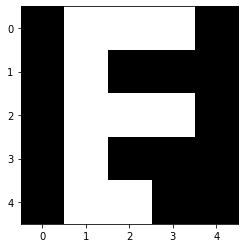

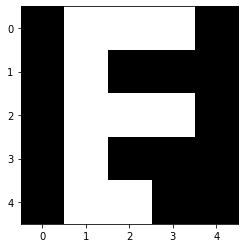

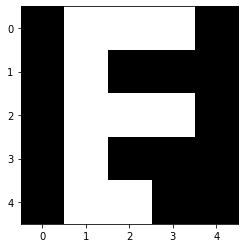

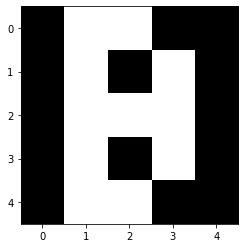

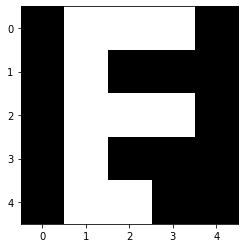

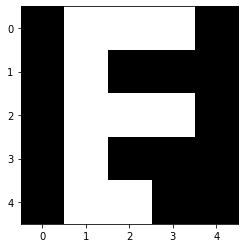

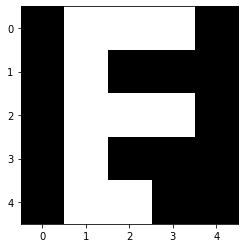

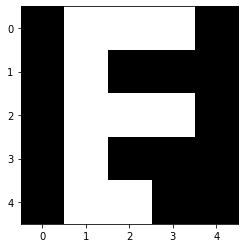

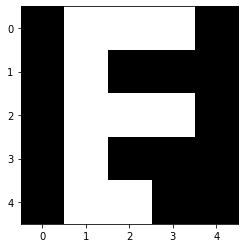

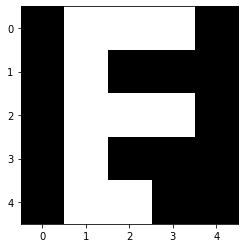

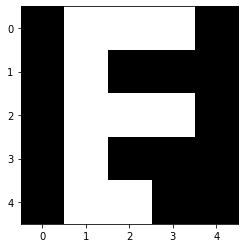

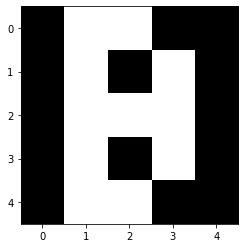

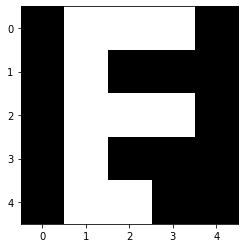

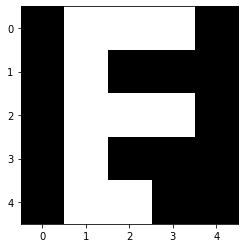

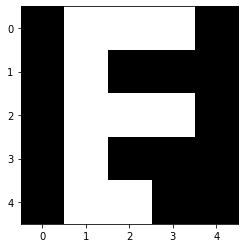

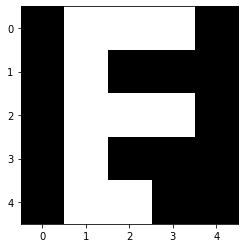

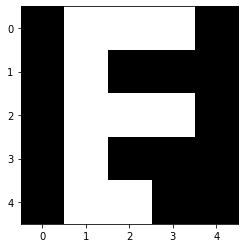

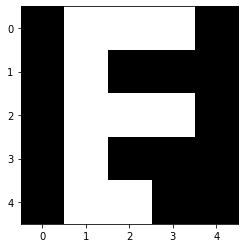

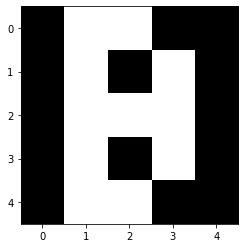

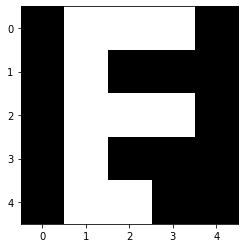

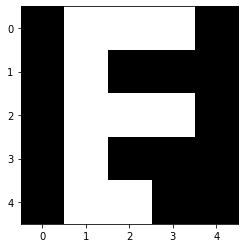

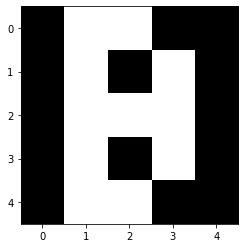

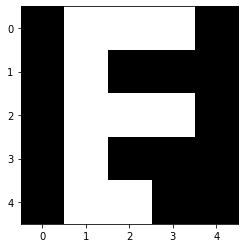

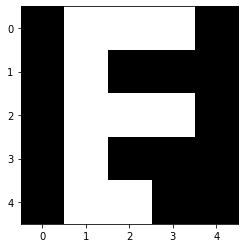

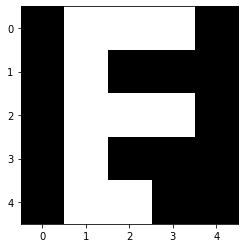

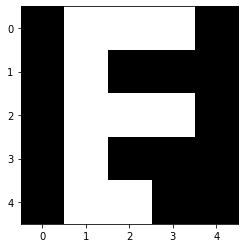

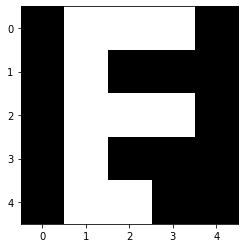

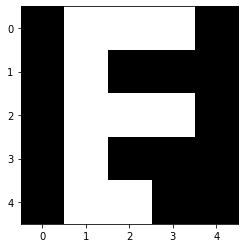

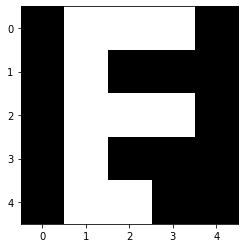

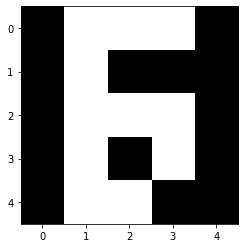

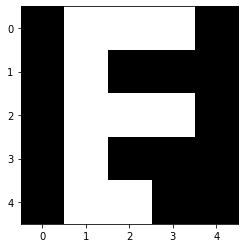

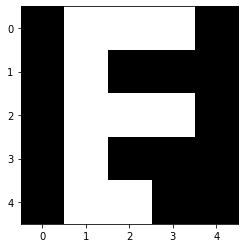

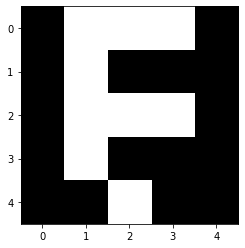

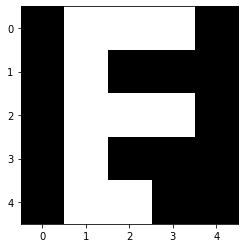

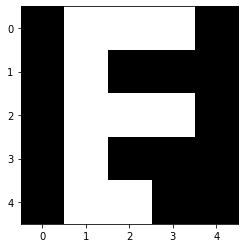

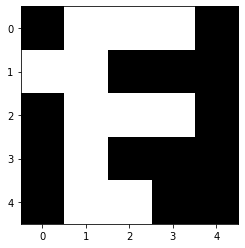

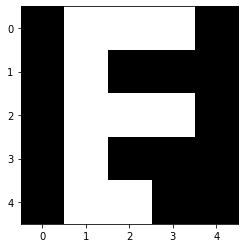

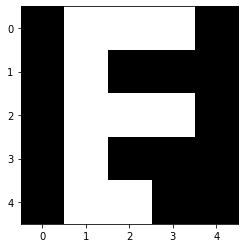

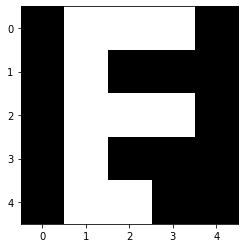

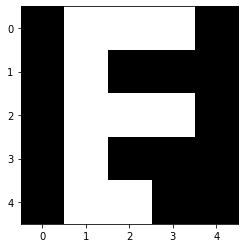

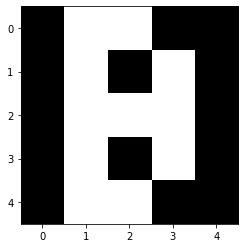

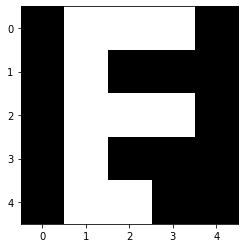

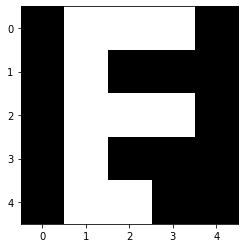

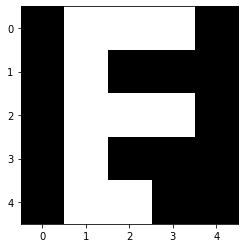

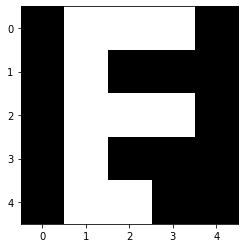

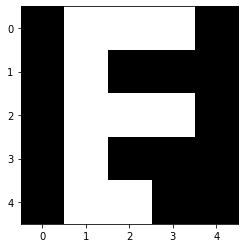

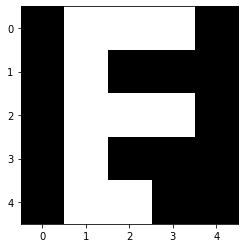

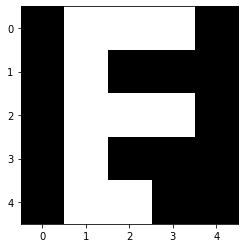

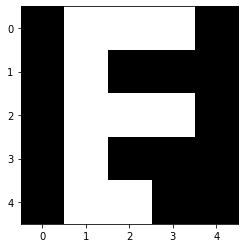

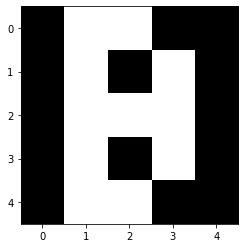

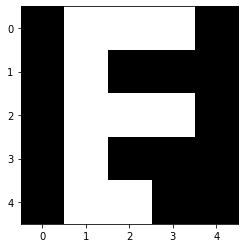

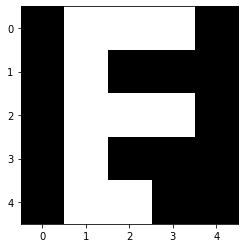

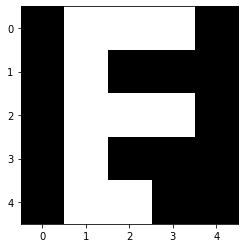

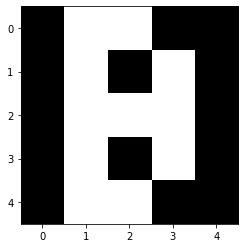

In [8]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.imshow(q_rec_all[5][10*i].reshape(5,5), cmap="gray")

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


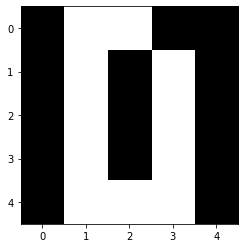

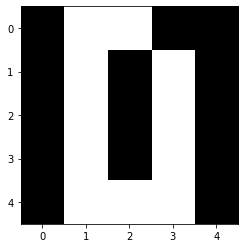

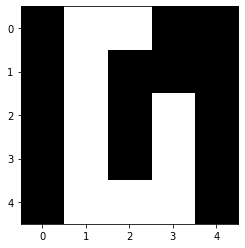

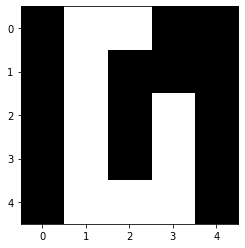

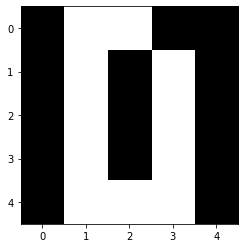

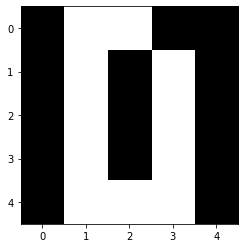

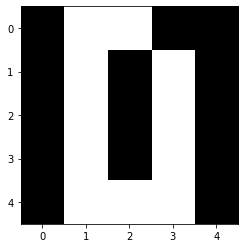

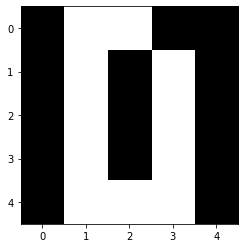

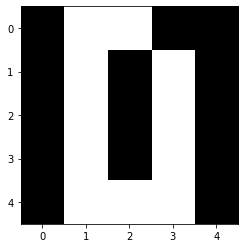

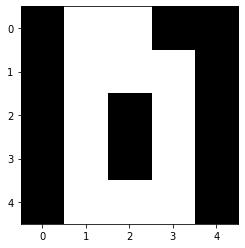

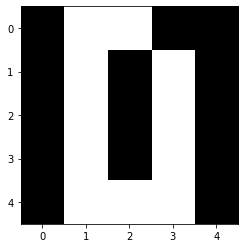

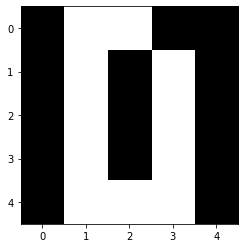

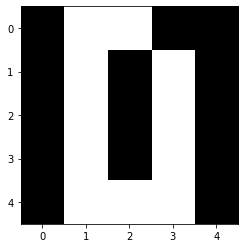

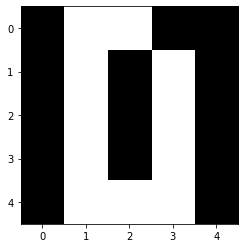

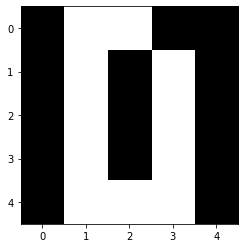

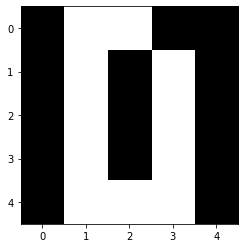

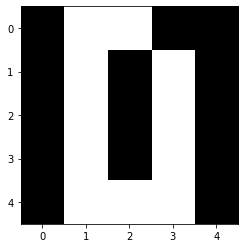

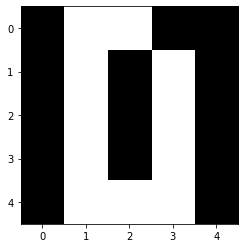

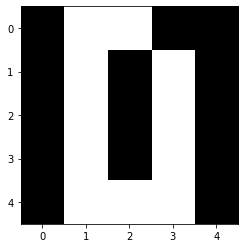

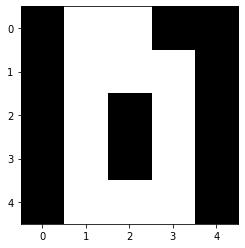

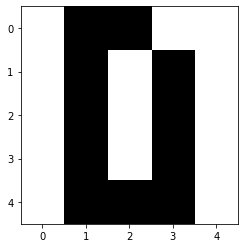

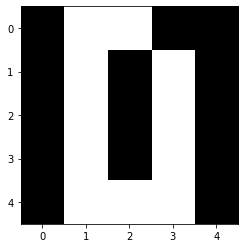

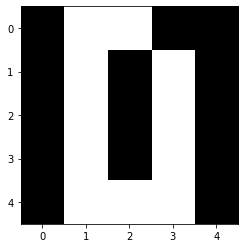

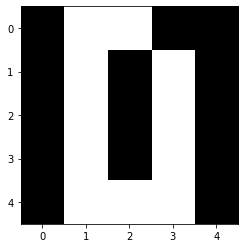

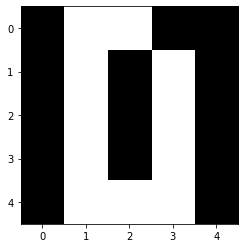

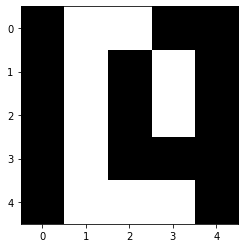

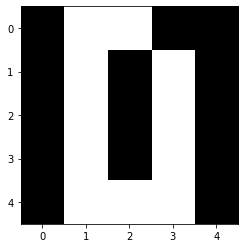

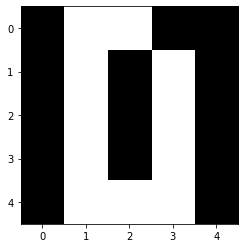

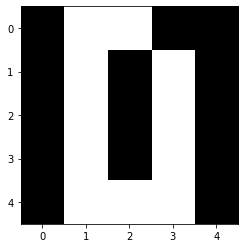

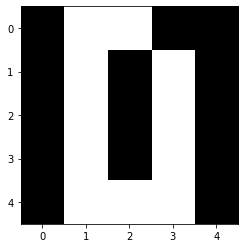

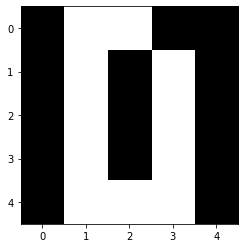

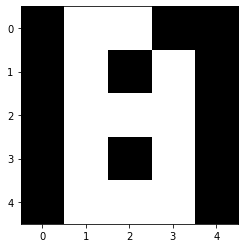

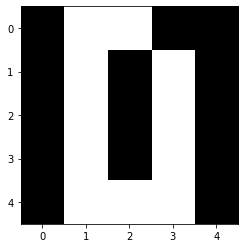

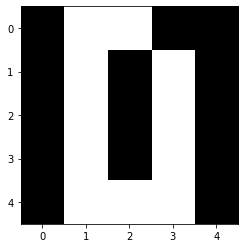

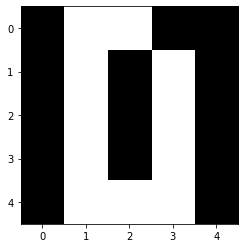

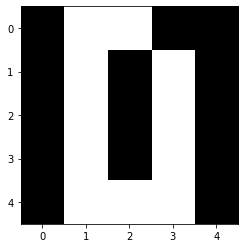

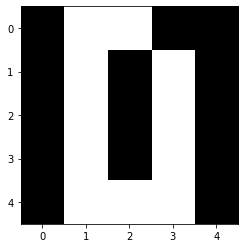

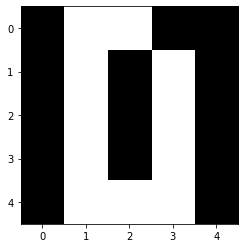

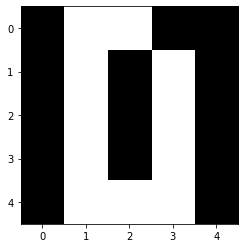

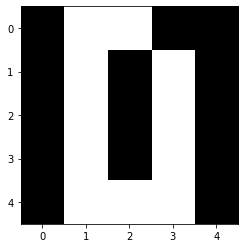

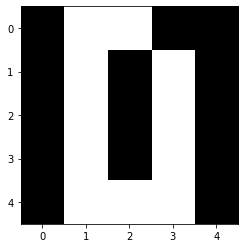

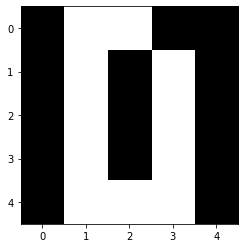

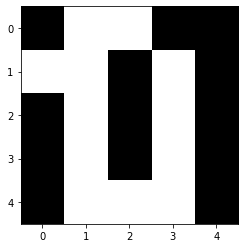

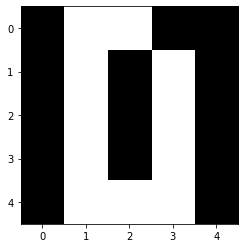

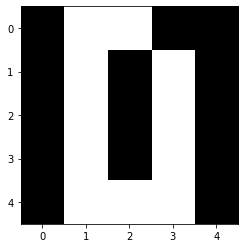

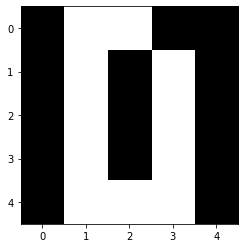

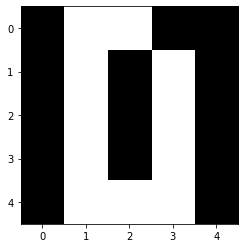

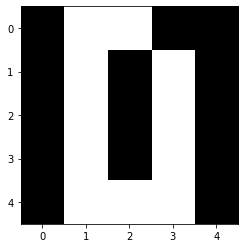

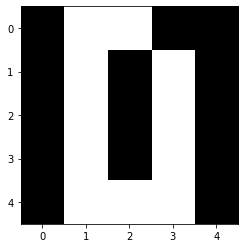

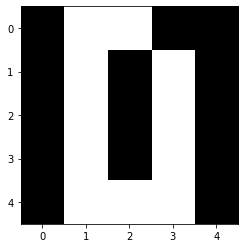

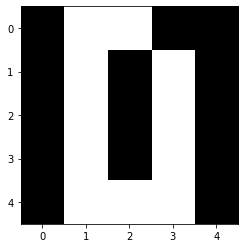

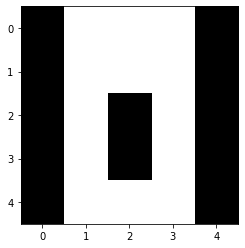

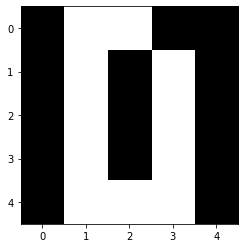

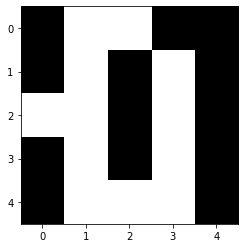

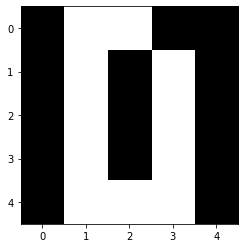

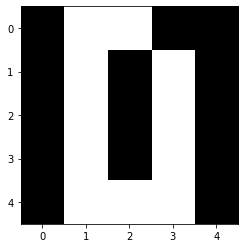

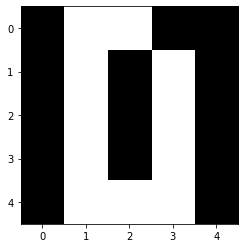

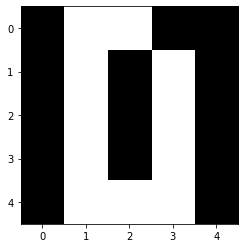

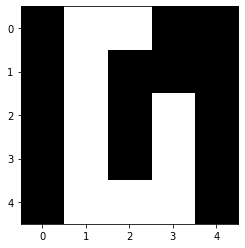

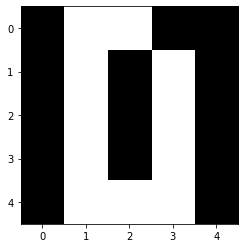

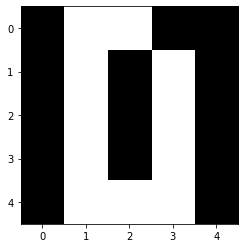

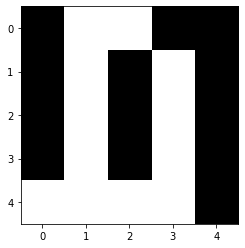

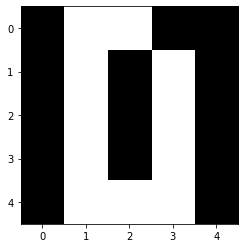

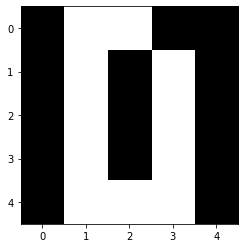

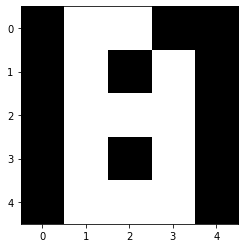

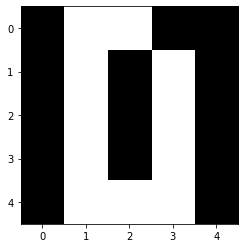

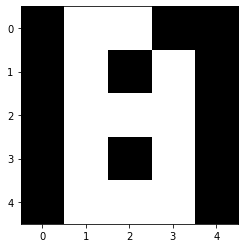

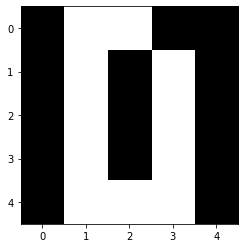

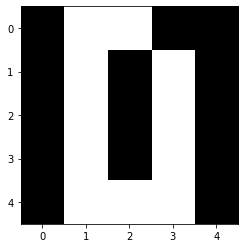

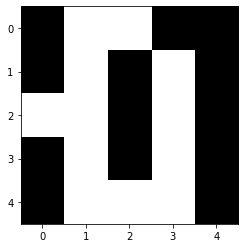

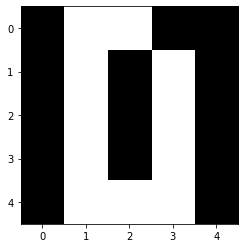

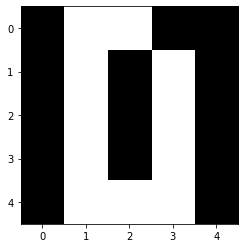

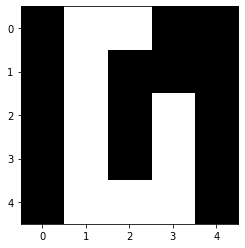

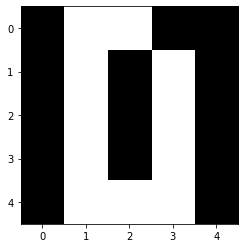

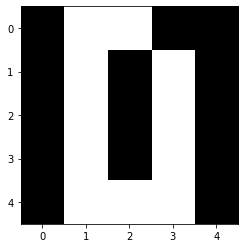

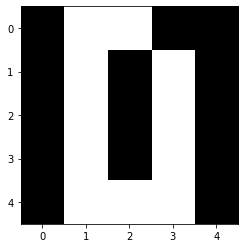

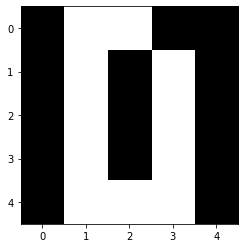

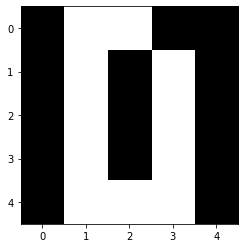

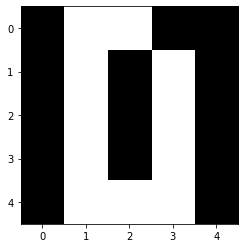

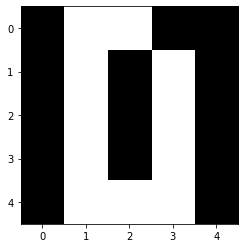

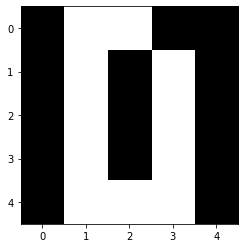

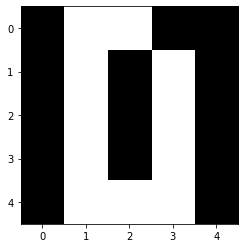

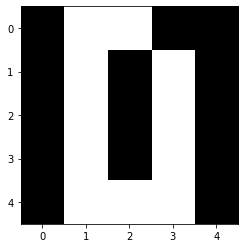

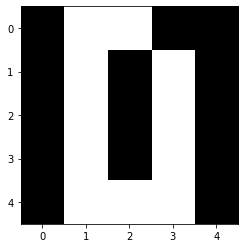

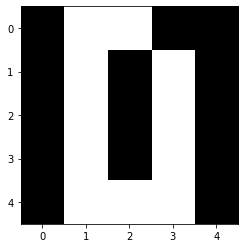

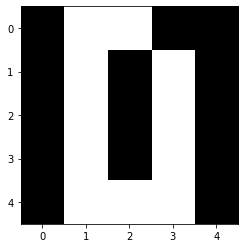

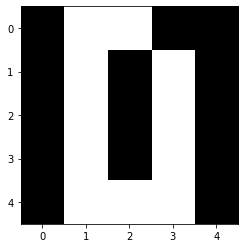

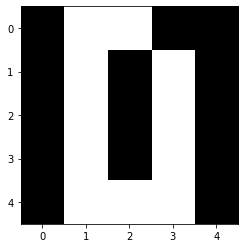

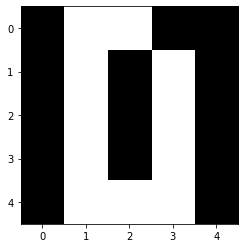

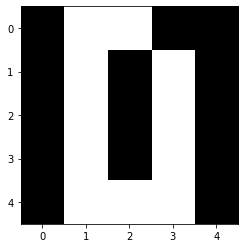

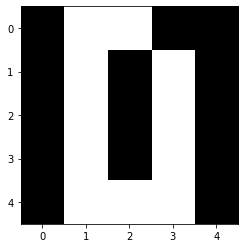

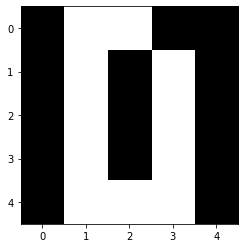

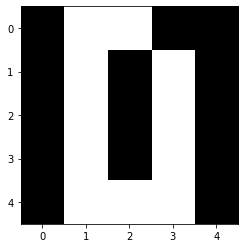

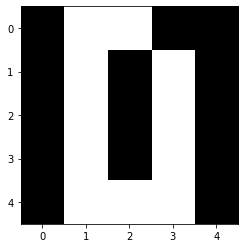

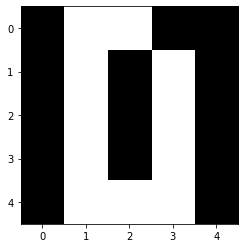

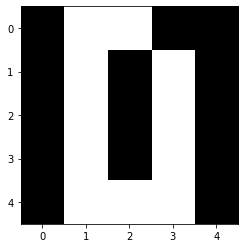

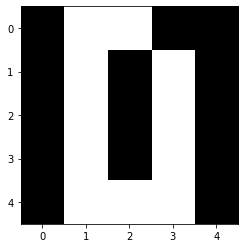

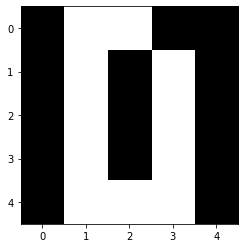

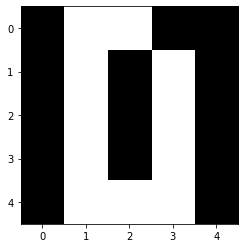

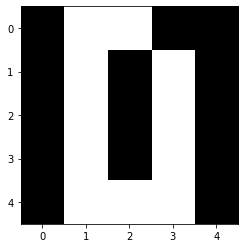

In [5]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.imshow(q_rec_all[4][10*i].reshape(5,5), cmap="gray")

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


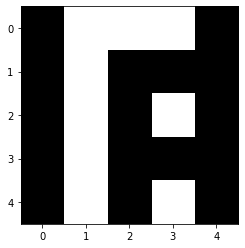

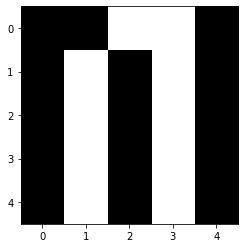

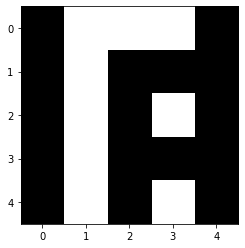

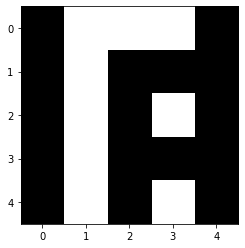

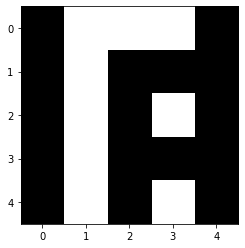

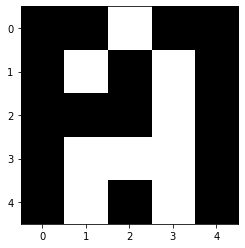

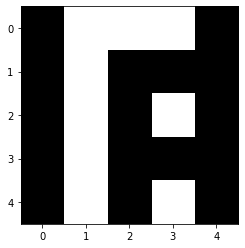

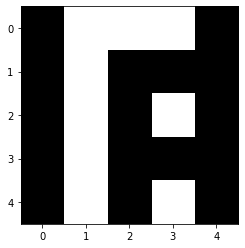

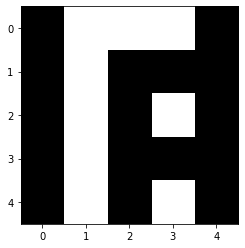

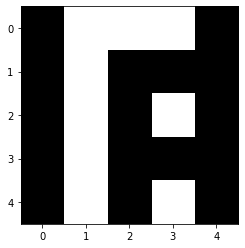

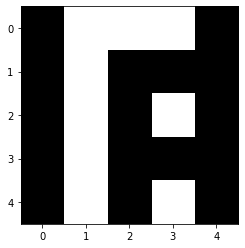

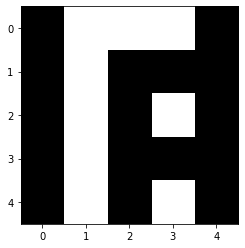

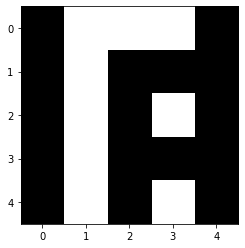

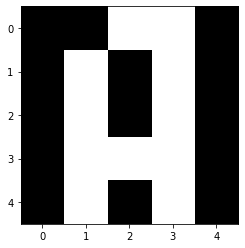

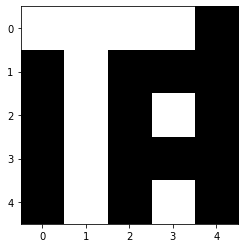

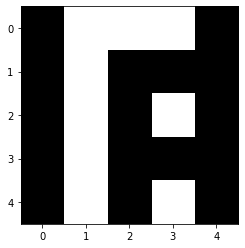

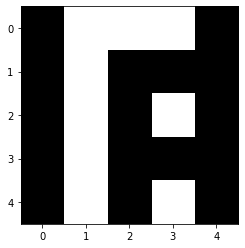

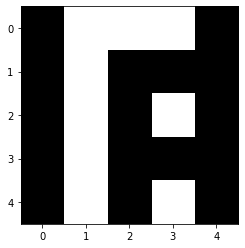

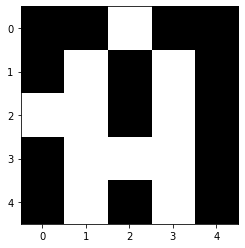

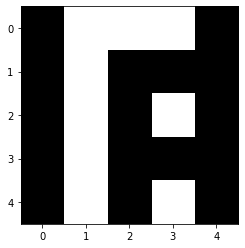

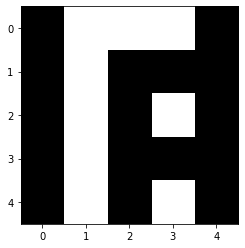

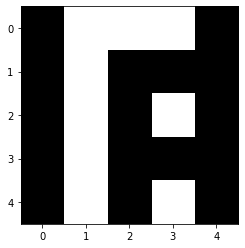

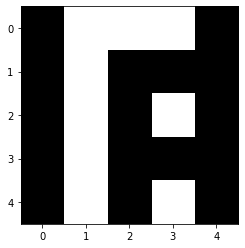

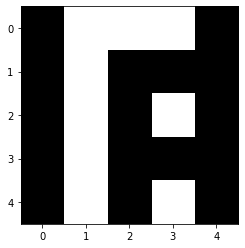

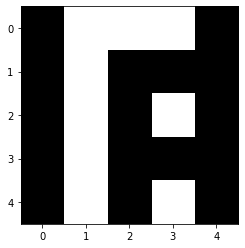

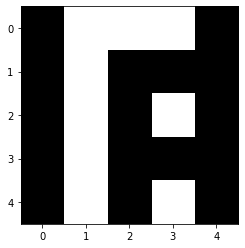

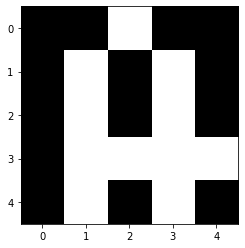

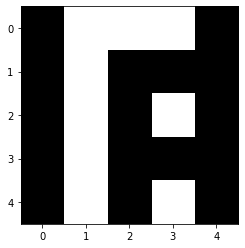

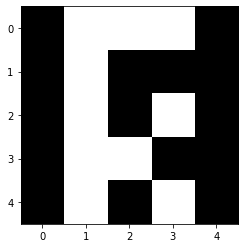

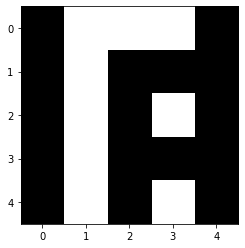

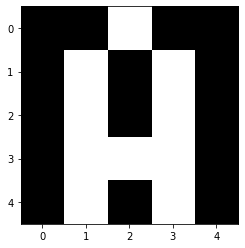

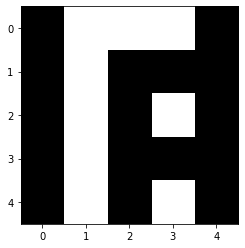

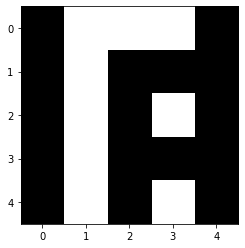

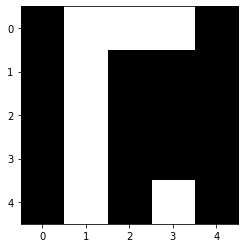

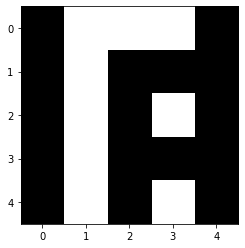

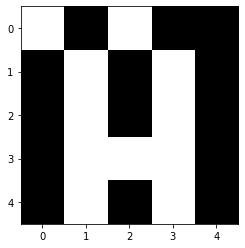

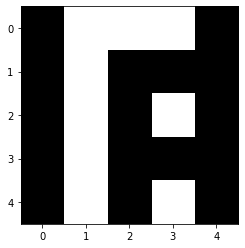

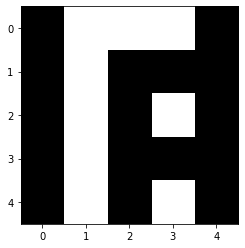

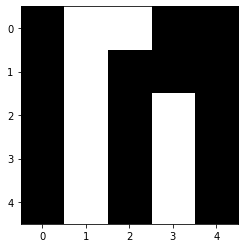

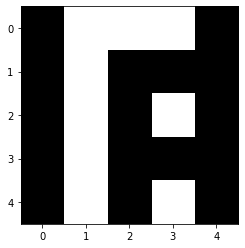

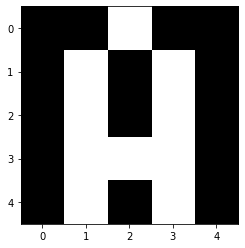

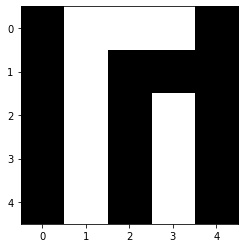

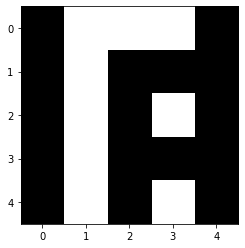

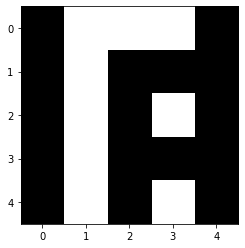

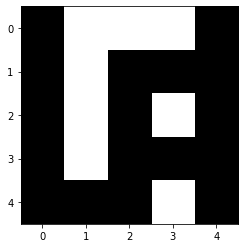

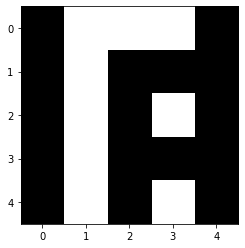

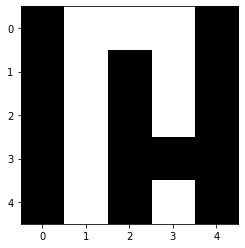

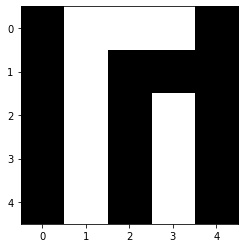

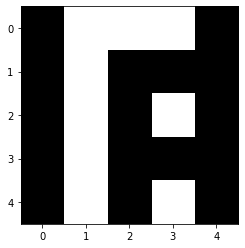

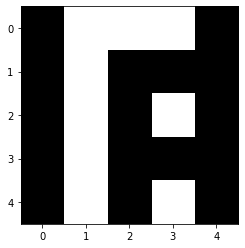

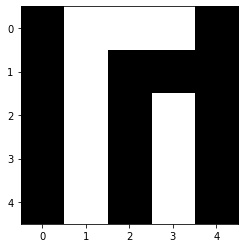

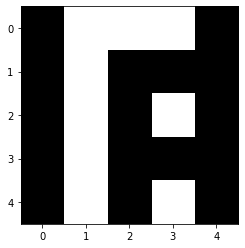

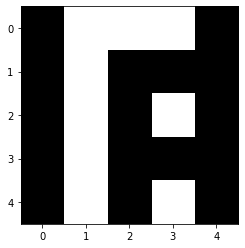

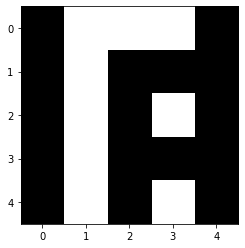

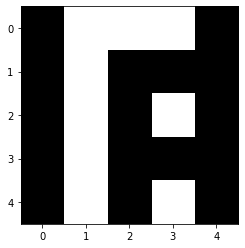

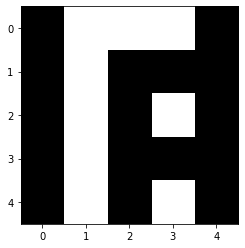

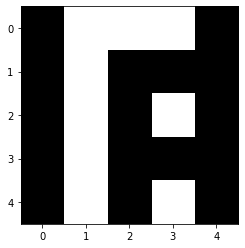

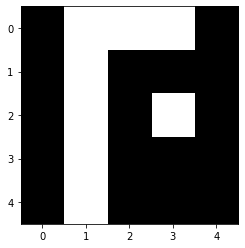

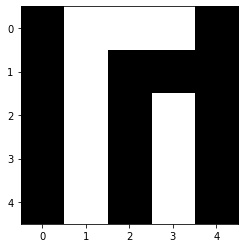

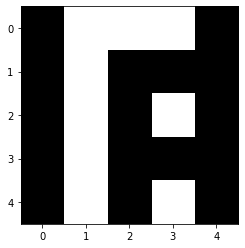

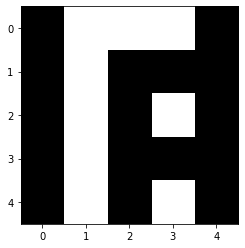

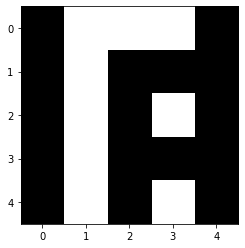

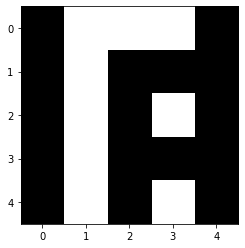

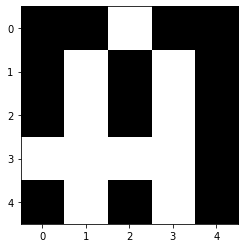

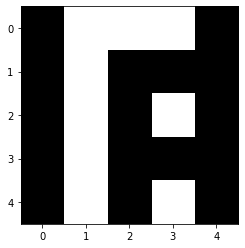

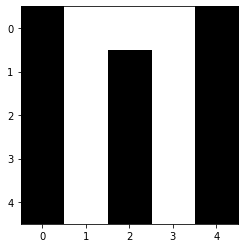

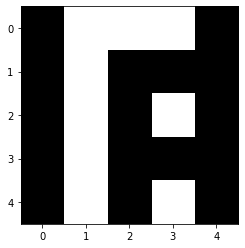

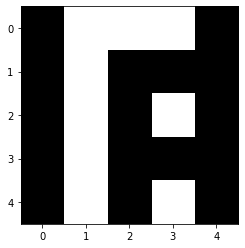

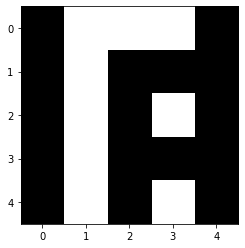

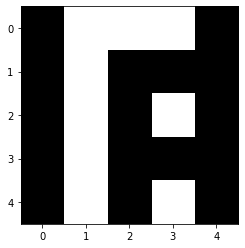

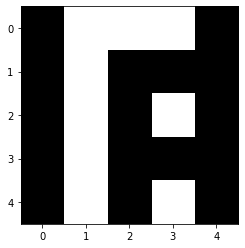

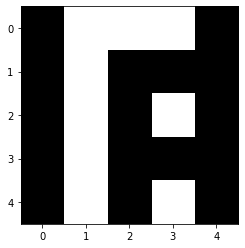

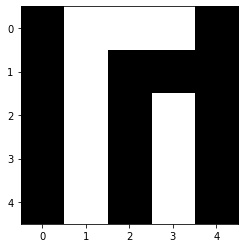

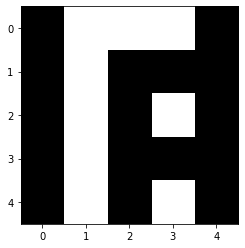

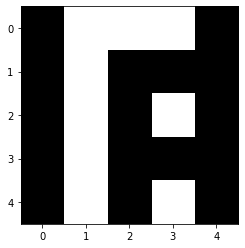

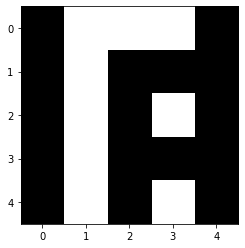

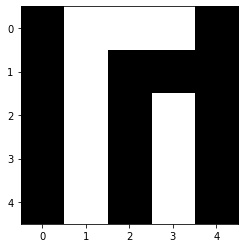

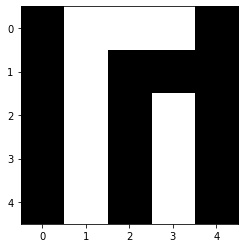

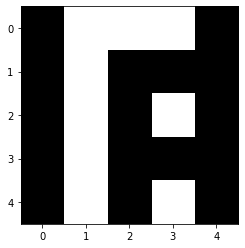

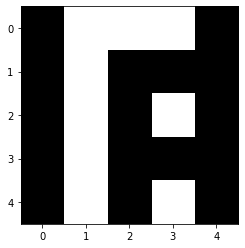

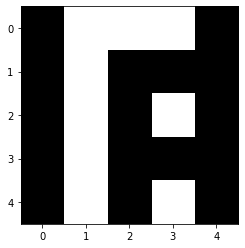

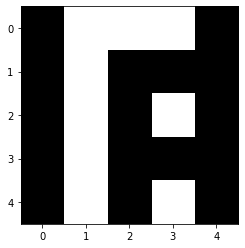

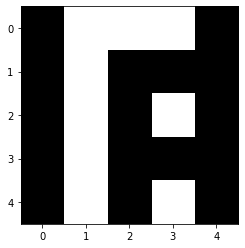

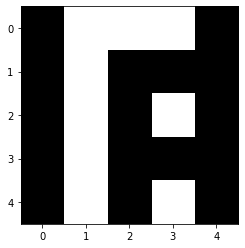

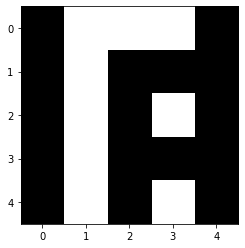

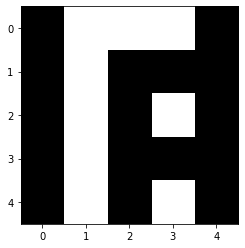

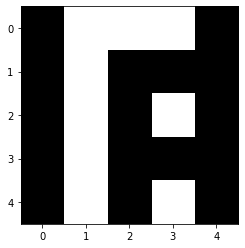

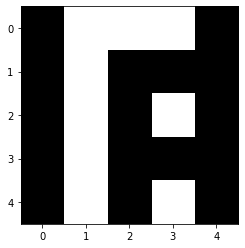

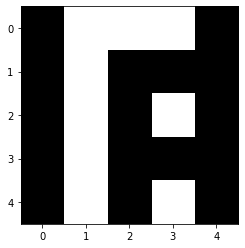

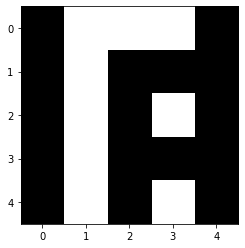

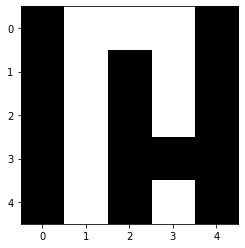

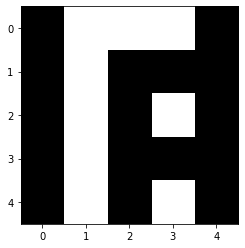

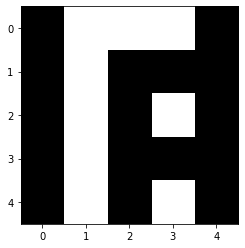

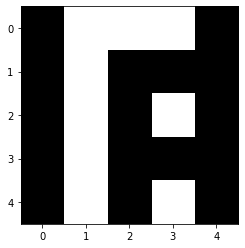

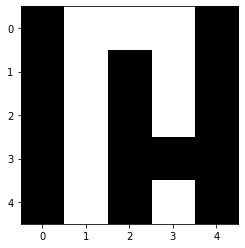

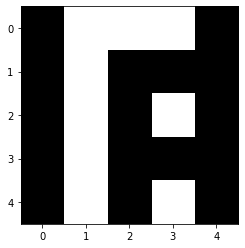

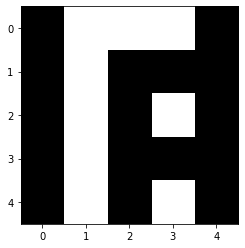

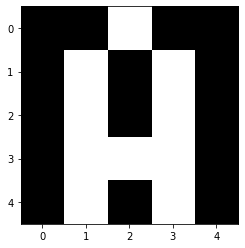

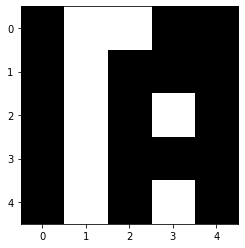

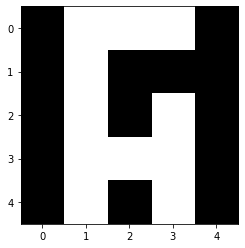

In [7]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.imshow(q_rec_all[1][10*i].reshape(5,5), cmap="gray")

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


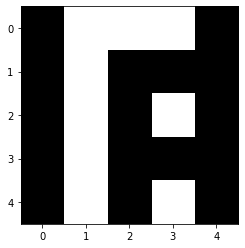

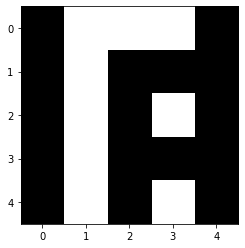

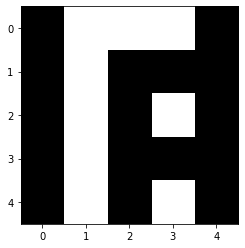

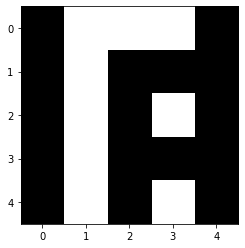

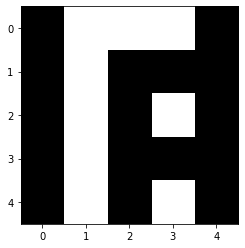

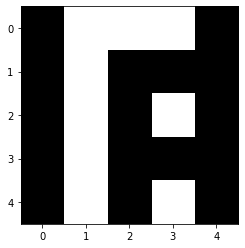

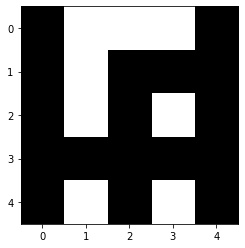

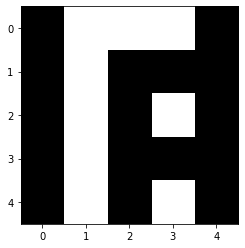

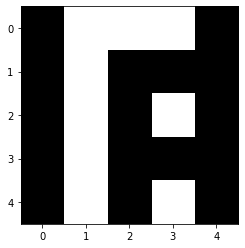

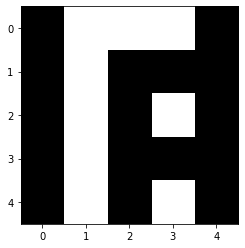

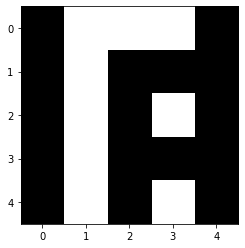

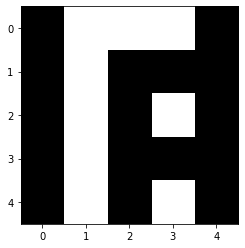

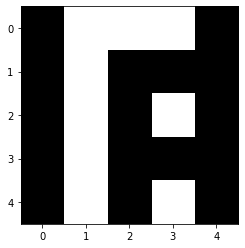

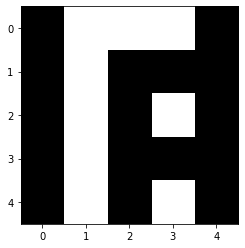

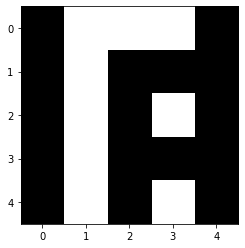

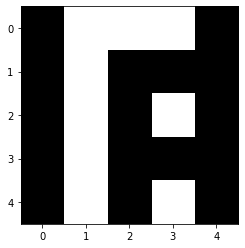

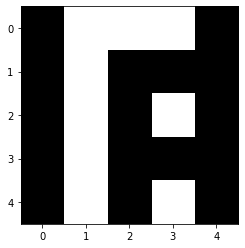

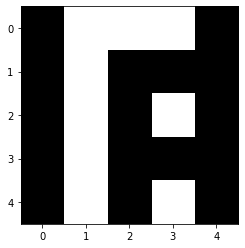

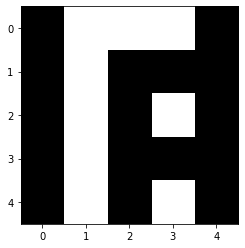

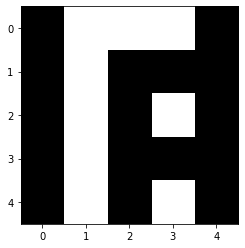

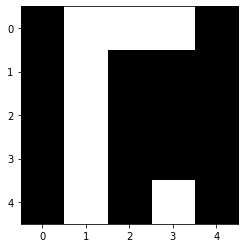

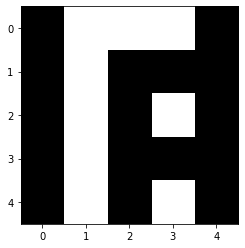

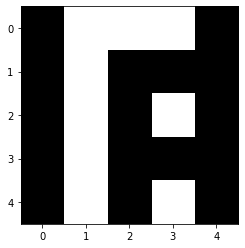

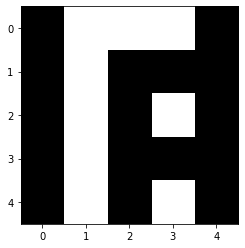

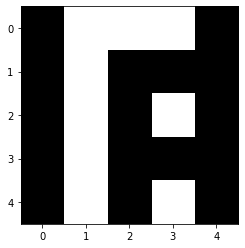

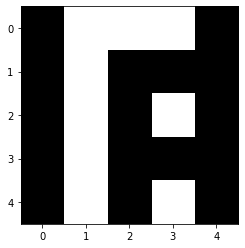

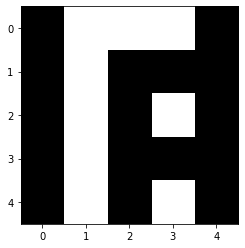

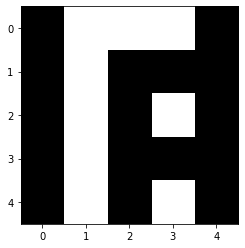

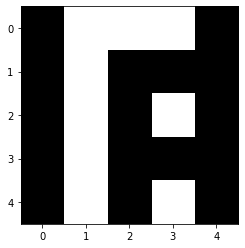

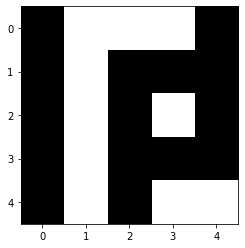

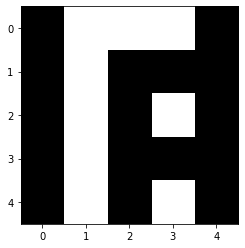

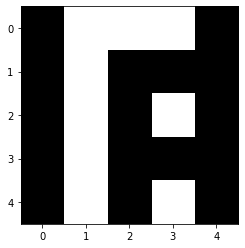

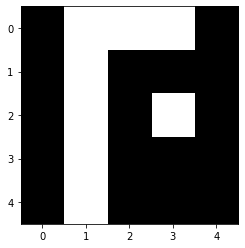

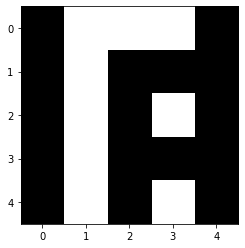

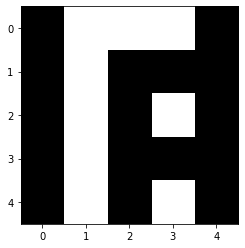

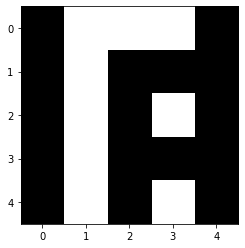

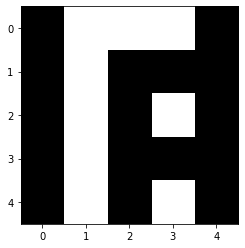

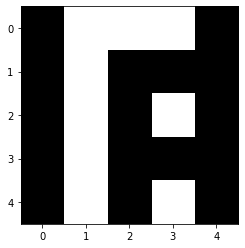

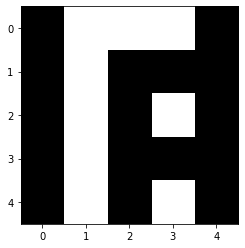

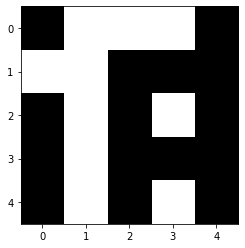

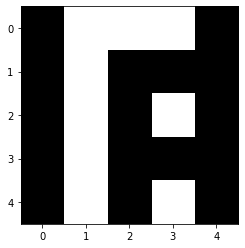

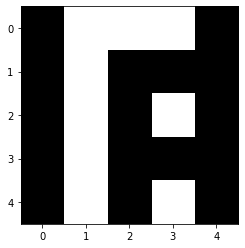

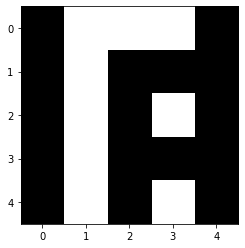

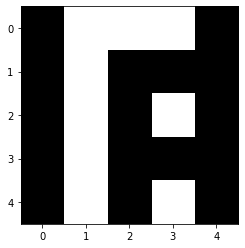

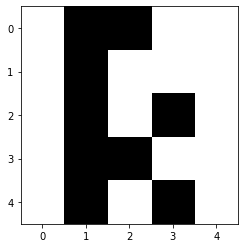

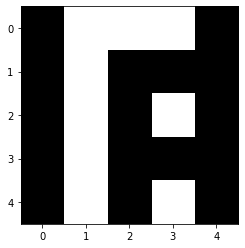

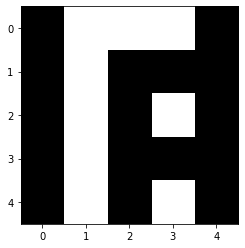

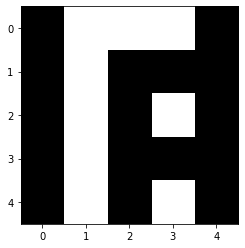

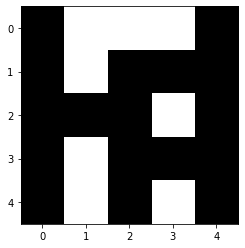

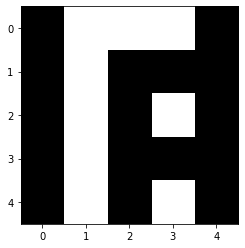

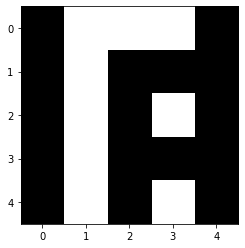

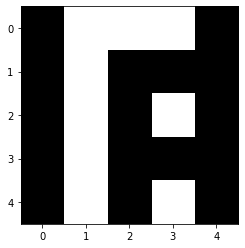

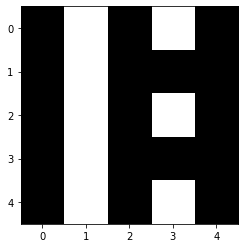

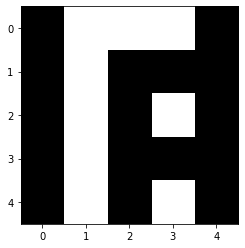

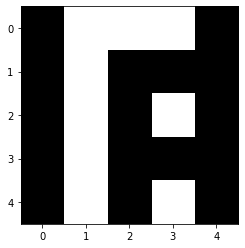

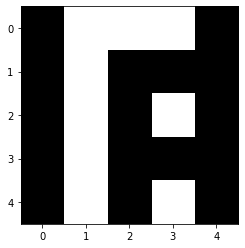

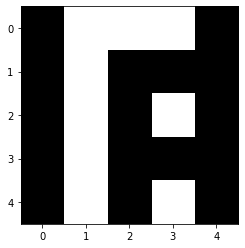

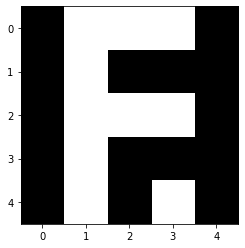

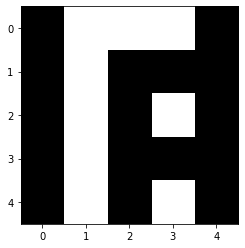

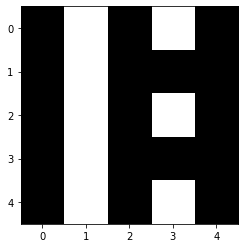

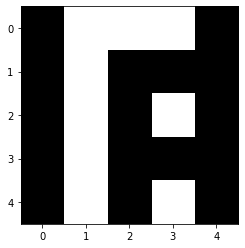

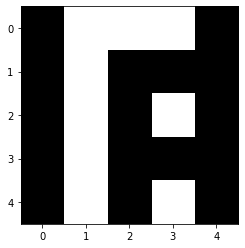

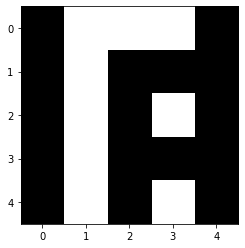

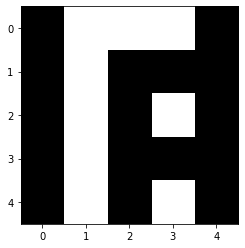

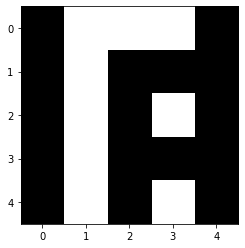

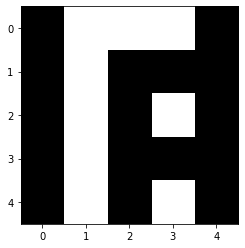

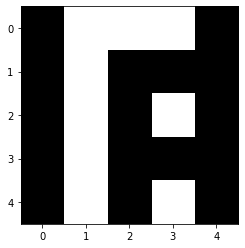

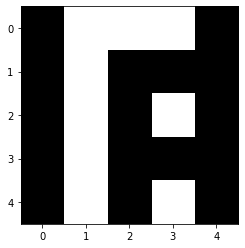

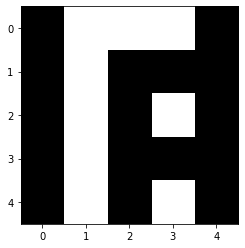

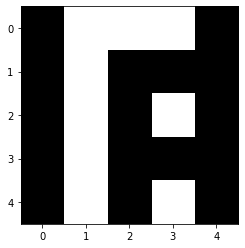

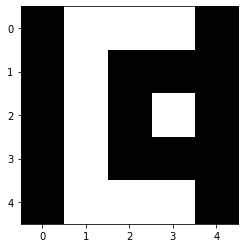

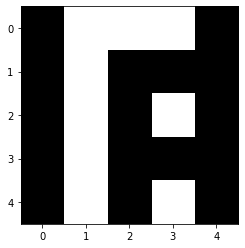

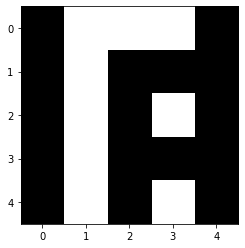

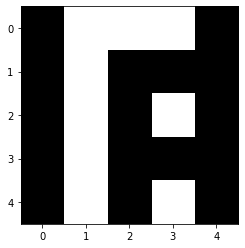

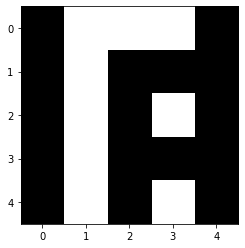

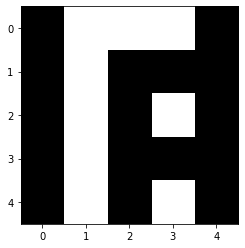

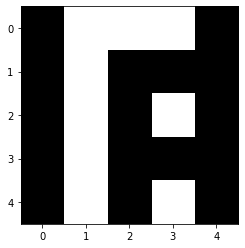

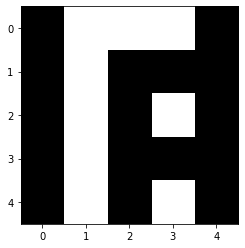

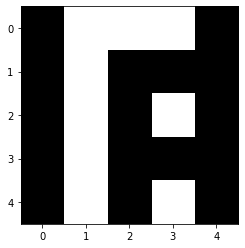

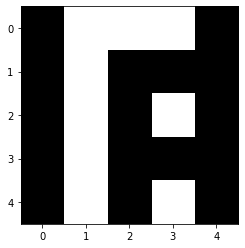

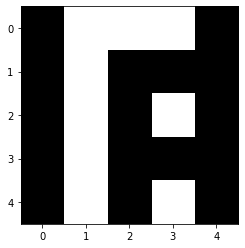

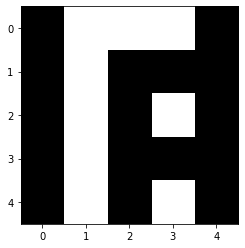

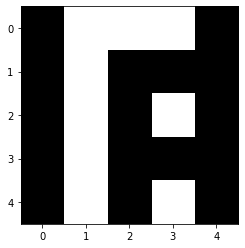

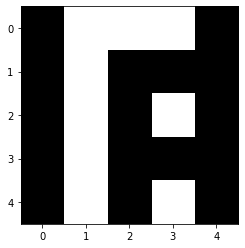

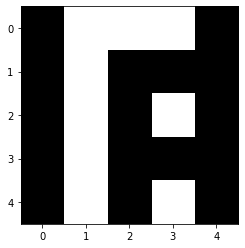

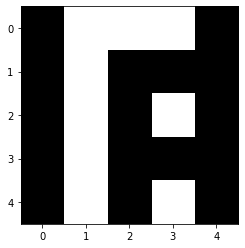

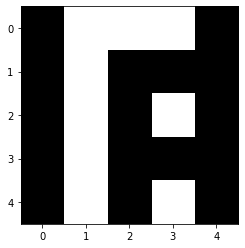

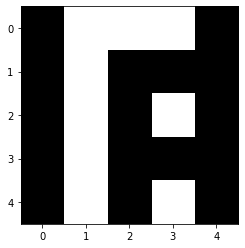

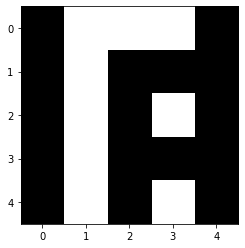

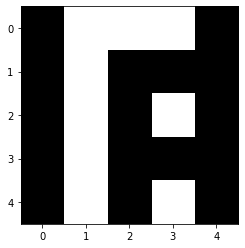

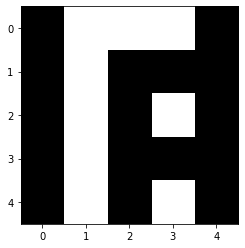

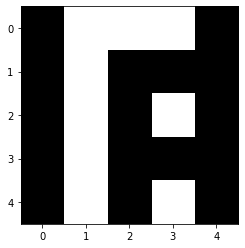

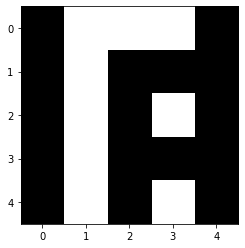

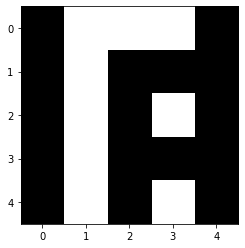

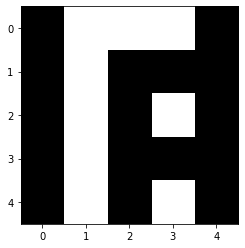

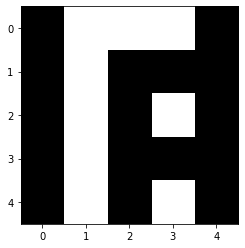

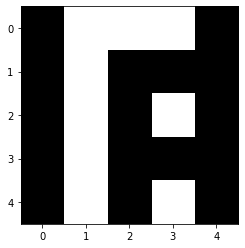

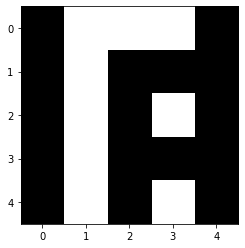

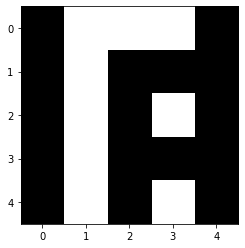

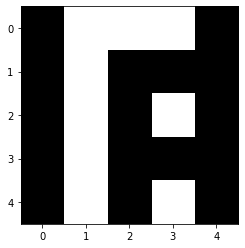

In [8]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.imshow(q_rec_all[2][10*i].reshape(5,5), cmap="gray")

/home/mech-user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


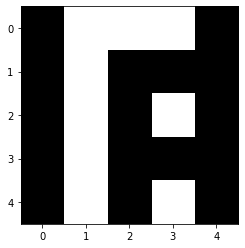

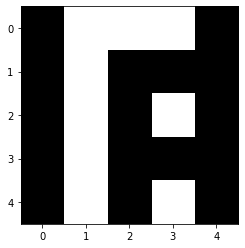

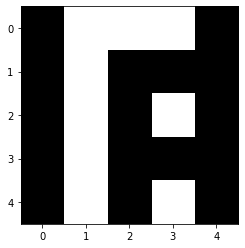

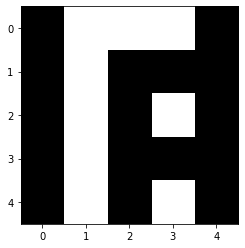

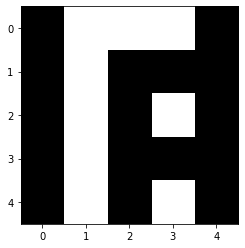

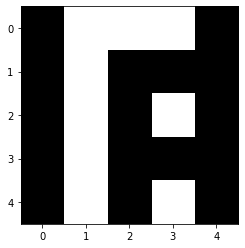

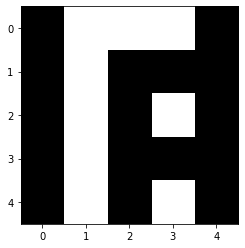

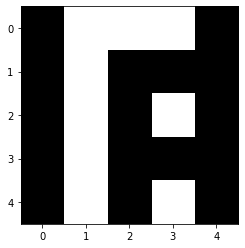

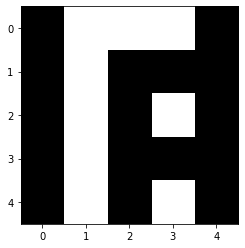

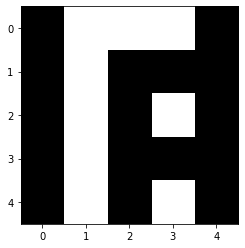

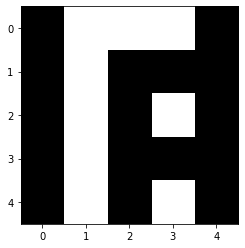

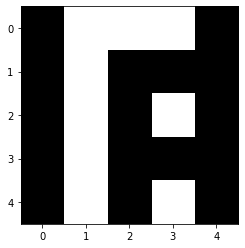

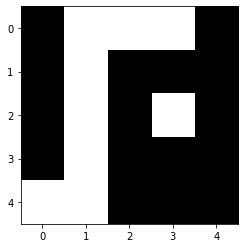

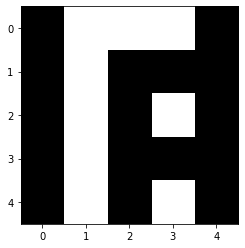

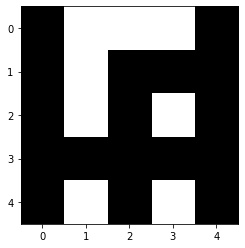

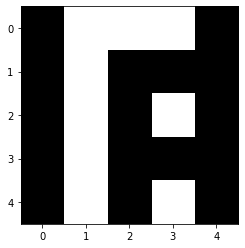

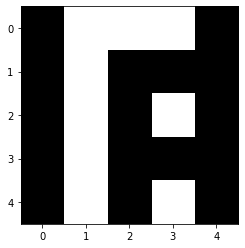

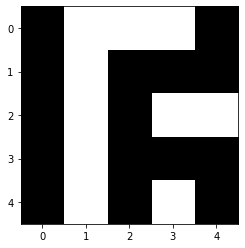

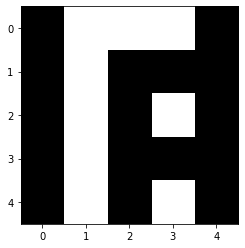

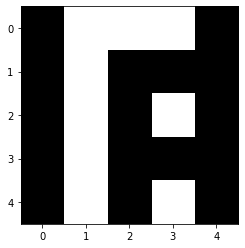

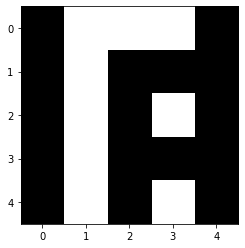

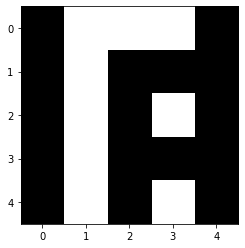

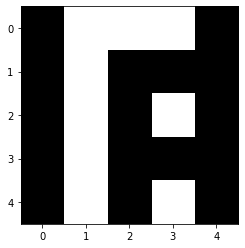

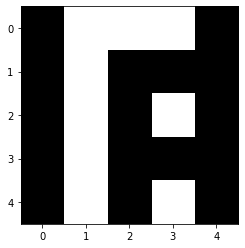

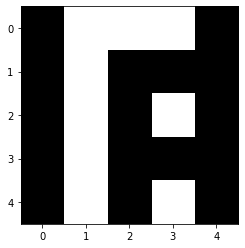

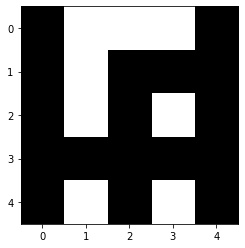

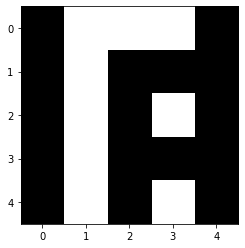

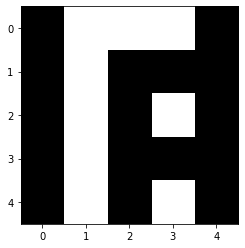

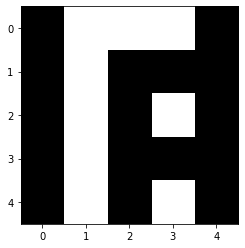

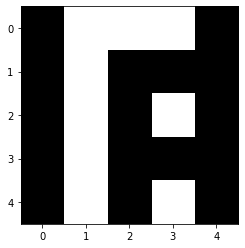

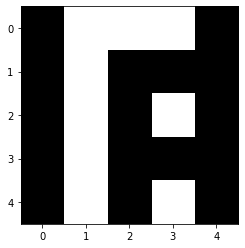

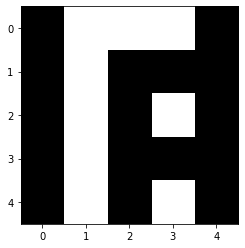

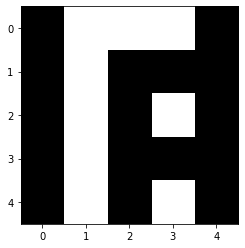

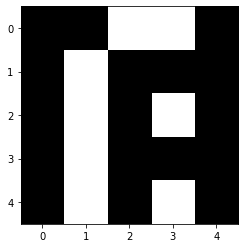

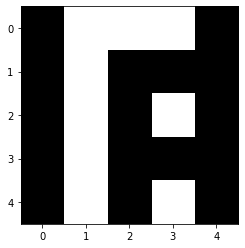

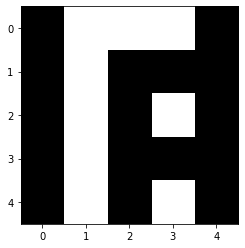

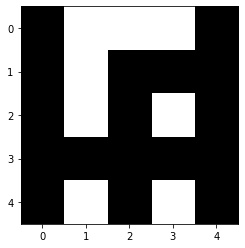

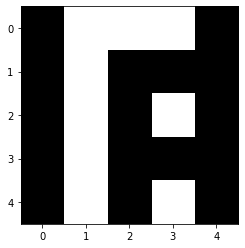

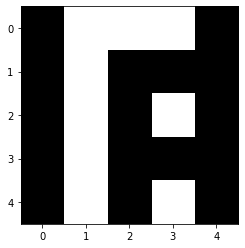

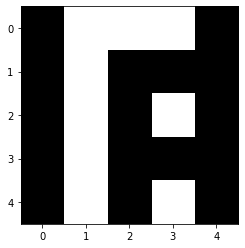

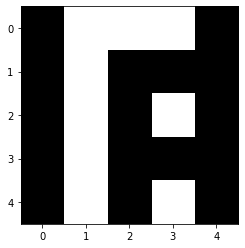

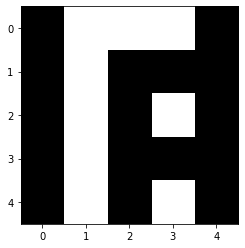

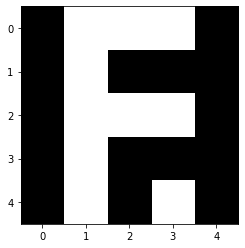

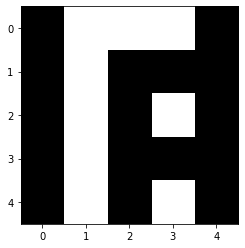

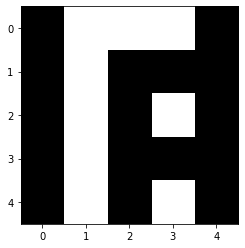

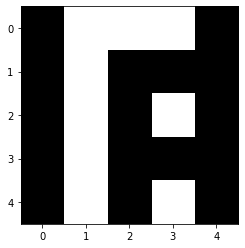

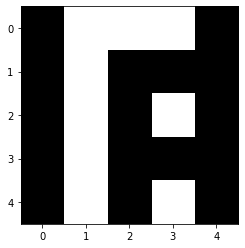

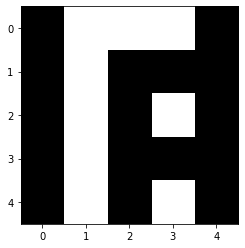

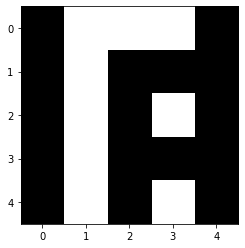

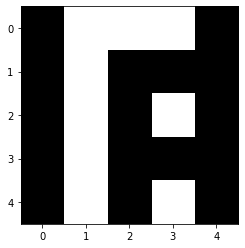

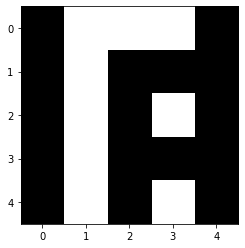

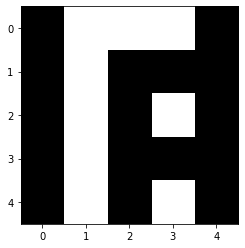

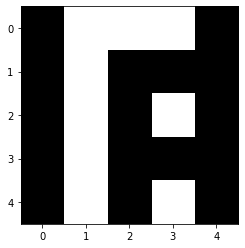

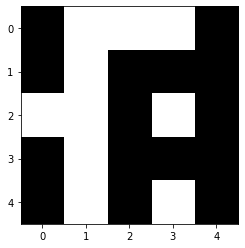

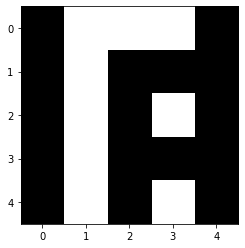

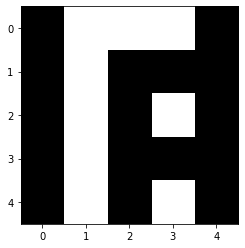

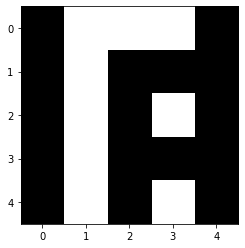

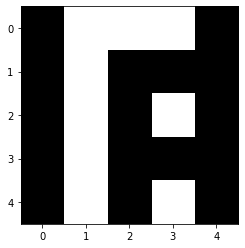

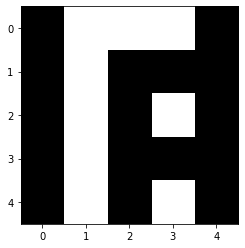

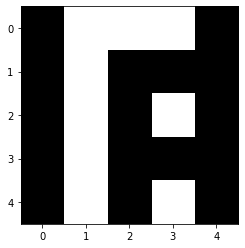

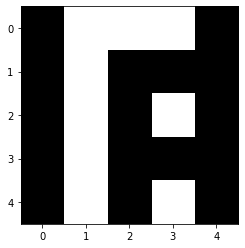

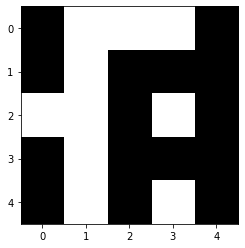

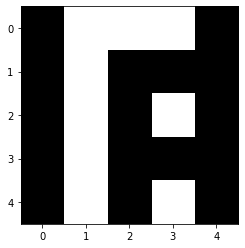

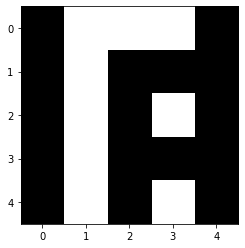

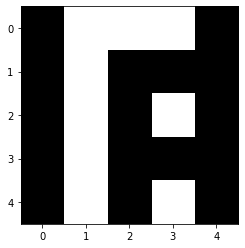

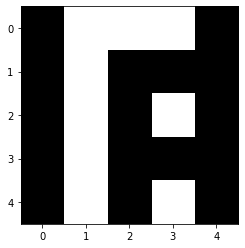

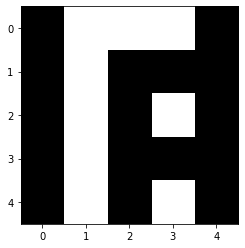

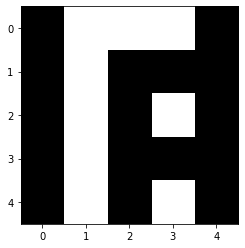

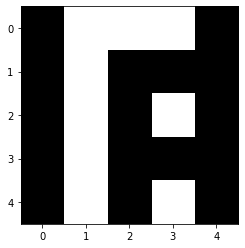

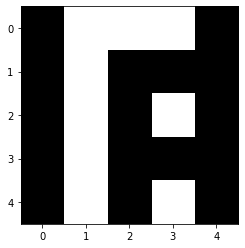

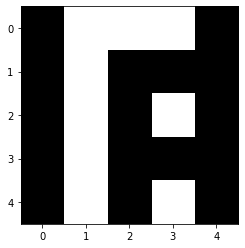

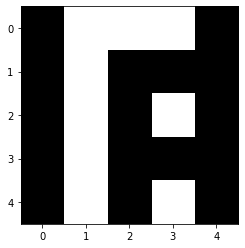

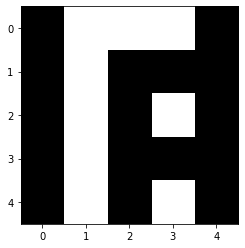

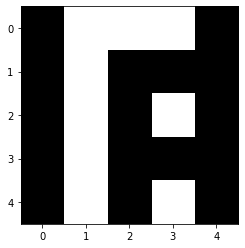

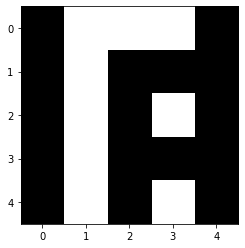

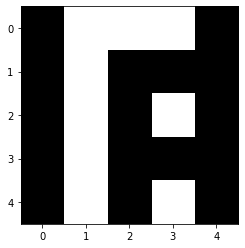

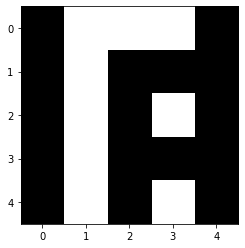

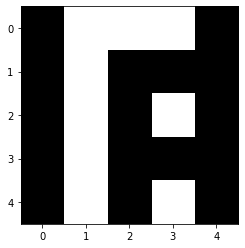

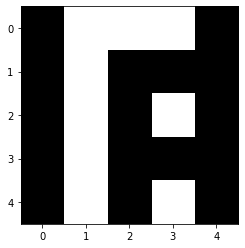

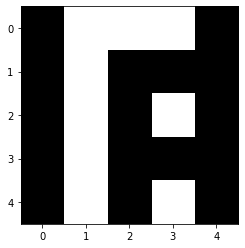

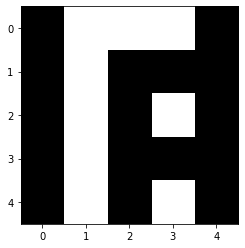

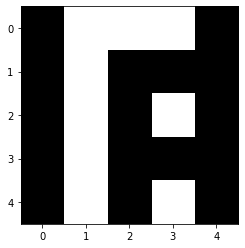

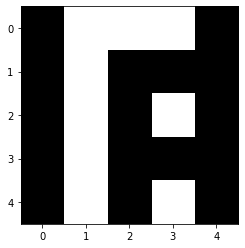

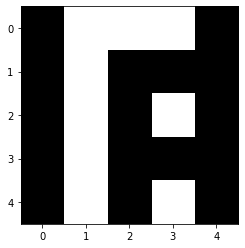

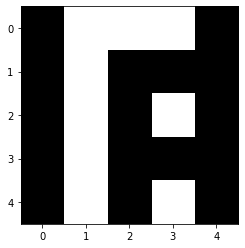

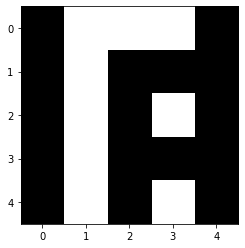

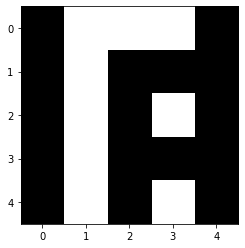

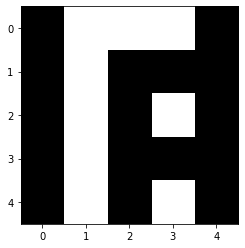

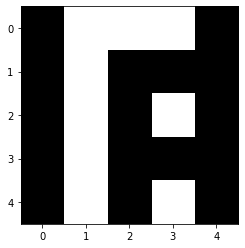

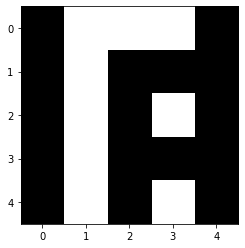

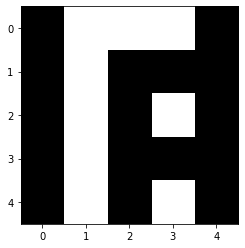

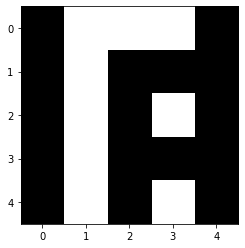

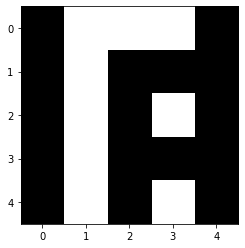

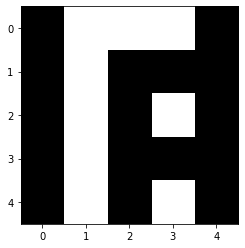

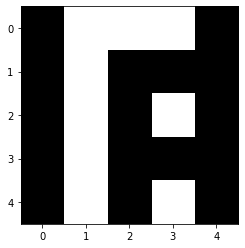

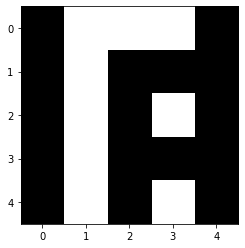

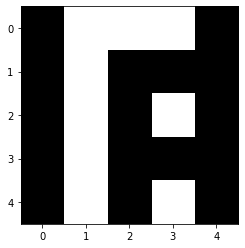

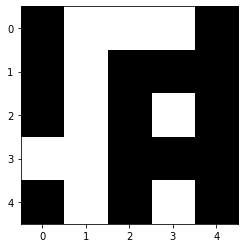

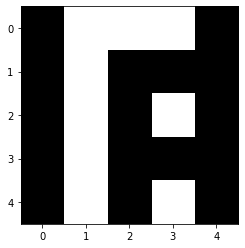

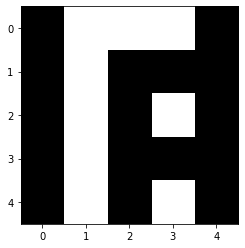

In [10]:
for i in range(100):
    fig, ax = plt.subplots()
    ax.imshow(q_rec_all[5][10*i].reshape(5,5), cmap="gray")

In [2]:
#画像の読み込み
Q_1 = np.loadtxt("picture/picture_1.csv", delimiter = ",", dtype = int)
Q_2 = np.loadtxt("picture/picture_2.csv", delimiter = ",", dtype = int)
Q_3 = np.loadtxt("picture/picture_3.csv", delimiter = ",", dtype = int)
Q_4 = np.loadtxt("picture/picture_4.csv", delimiter = ",", dtype = int)
Q_5 = np.loadtxt("picture/picture_5.csv", delimiter = ",", dtype = int)
Q_6 = np.loadtxt("picture/picture_6.csv", delimiter = ",", dtype = int)

In [3]:
q_1 = np.array([Q_1.flatten()])
q_2 = np.array([Q_2.flatten()])
q_3 = np.array([Q_3.flatten()])
q_4 = np.array([Q_4.flatten()])
q_5 = np.array([Q_5.flatten()])
q_6 = np.array([Q_6.flatten()])

In [4]:
q = np.zeros([6,25])

In [5]:
q[0] = q_1[0]
q[1] = q_2[0]
q[2] = q_3[0]
q[3] = q_4[0]
q[4] = q_5[0]
q[5] = q_6[0]

In [37]:
np.array([q[0]])

array([[-1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
         1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1.]])

In [15]:
q_1[0]

array([-1, -1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1,  1, -1, -1,  1,
        1,  1, -1, -1,  1, -1,  1, -1])

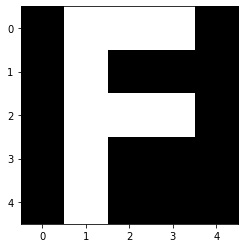

In [7]:
fig, ax = plt.subplots()
ax.imshow(Q_6, cmap="gray")

In [24]:
#重み行列の作成
W = np.zeros((6,6,25,25))
 

In [25]:
W[0][1] = np.dot(q_1.T,q_1)

In [26]:
#Wの対角成分をゼロに
W_diag = np.diag(W[0][1])
W_diag.flags.writeable = True
np.putmask(W_diag, W_diag > 0, 0)

In [27]:
noise = 20
thete = 0
N = 100
epoch = 1000
similar_all = np.zeros((6, 1000,100))
q_noise_all = np.zeros((6, 1000, 25))
q_rec_all = np.zeros((6, 1000, 25))

In [28]:
recall_performance = np.zeros(6)
correct_answer = np.zeros(6)

In [38]:
for e in range(epoch):
    q_noise_all[0][e] = make_noise(np.array([q[0]]), noise)

    similar_all[0][e], q_rec_all[0][e] = recollection(q[0], q_noise_all[0][e], W[0][1], thete, N)
    
    recall_performance[0] += similar_all[0][e][-1]

    if similar_all[0][e][-1] == 1.0:
        correct_answer[0] += 1

In [39]:
recall_performance[0]

1990.8400000000045

In [40]:
correct_answer[0]

1823.0

In [20]:
Q_1_rec = q_1_rec_all[-1].reshape(5,5)

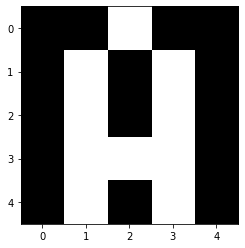

In [21]:
fig, ax = plt.subplots()
ax.imshow(Q_1_rec, cmap="gray")

In [10]:
similar_all[0], q_1_rec_all[0] = recollection(q_1[0], q_1_noise_all[0], W, thete, 100)

In [13]:
similar_all[0][-1]

1.0

In [15]:
q_1_rec_all[0]

array([-1.,  1.,  1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,
        1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1., -1., -1.])

In [16]:
q_1_noise_all[0]

array([-1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1., -1., -1.,  1., -1.,
        1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.])

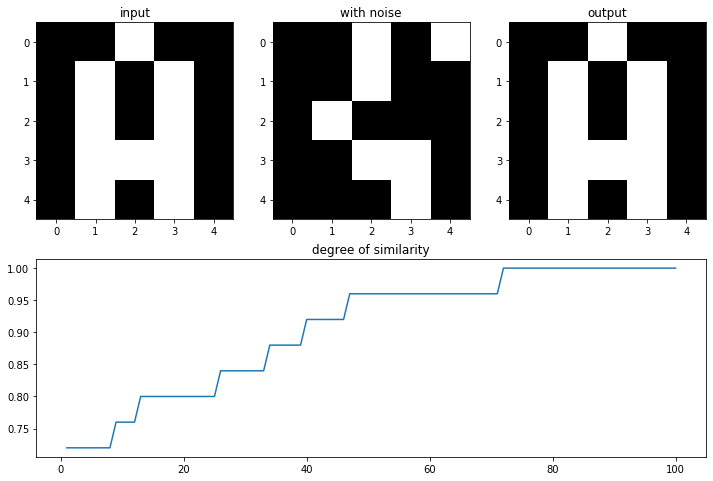

In [12]:
Q_1_rec = q_1_rec_all[0].reshape(5,5)
Q_1_noise = q_1_noise_all[0].reshape(5,5)
x = np.linspace(1,100,100)
fig = plt.figure(figsize = (12,8))
gs = gridspec.GridSpec(2,3)

ax1 = fig.add_subplot(gs[0,0])
ax1.set_title('input')
ax1.imshow(Q_1, cmap="gray")
ax2 = fig.add_subplot(gs[0,1])
ax2.set_title('with noise')
ax2.imshow(Q_1_noise, cmap="gray")
ax3 = fig.add_subplot(gs[0,2])
ax3.set_title('output')
ax3.imshow(Q_1_rec, cmap="gray")
ax4 = fig.add_subplot(gs[1,:])
ax4.set_title('degree of similarity')
ax4.plot(x, similar_all[0])

In [14]:
similar

array([0.28, 0.28, 0.2 , 0.2 , 0.2 , 0.2 , 0.28, 0.28, 0.28, 0.28, 0.28,
       0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.36, 0.36, 0.36, 0.36, 0.36,
       0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36,
       0.36, 0.36, 0.36, 0.36, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44, 0.44,
       0.44, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52,
       0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.6 , 0.6 , 0.6 ,
       0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 , 0.6 ,
       0.6 ])

In [12]:
for n in range(100):
    similar = np.dot(q_1_noise[0], q_1[0]) / 25
    print(similar)
    i = np.random.randint(25)
    if np.dot(W[i], q_1_noise[0]) - thete >= 0:
        q_1_noise[0][i] = 1
    else:
        q_1_noise[0][i] = -1

0.6
0.6
0.6
0.6
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.68
0.76
0.76
0.76
0.76
0.76
0.76
0.76
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.92
0.92
0.92
0.92
0.92
0.92
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


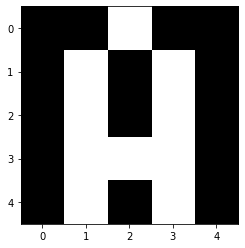

In [13]:
Q_1_rec = q_1_noise.reshape(5,5)
fig, ax = plt.subplots()
ax.imshow(Q_1_rec, cmap="gray")

array([[ 1, -1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1,  1,
         1, -1, -1, -1,  1, -1,  1, -1,  1]])

In [17]:
q_1_noise = q_1

In [14]:
q_2_noise = make_noise(q_2, noise)

In [15]:
q_2_noise

array([[-1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1, -1, -1, -1]])

In [16]:
for n in range(100):
    i = np.random.randint(25)
    if np.dot(W[i], q_2_noise[0]) - thete >= 0:
        q_2_noise[0][i] = 1
    else:
        q_2_noise[0][i] = -1

In [17]:
q_2

array([[ 1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1,  1, -1]])

In [18]:
q_2_noise

array([[ 1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1, -1,  1,  1,  1,  1, -1]])